In [1]:
import sys
import numpy as np
import pylab as pl
from scipy.stats import linregress
from scipy import stats  as S
%matplotlib inline

sys.path.append("/Users/maithoma/work/github/bsr/analysis/")
sys.path.append("/Users/maithoma/work/github/bsr/experiment/")
sys.path.append("/Users/maithoma/work/github/brainlib/")

#sys.path.append("/Users/maithoma/work/python/")
#from tm_python_lib import *

import Levenshtein
from scipy import stats as S

try:
    reload(bsrAnalysisLib)
    #reload(tasks)
except:
    import bsrAnalysisLib
    #import tasks
    
from bsrAnalysisLib import *
#from tasks import *

rootDir = "/Users/maithoma/work/github/bsr/analysis/"

In [2]:
from tasks import *
articles = ['bigPolluter',
         'emojiShortened',
         'indianFood',
         'marsOneShortened',
         'Ohmconnect',
         'pressFreedomUS']
aDic = getArticlesFromS3()

In [2]:
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','29979','d6dbd','2cd39','85d6e',
          '5f615','94460','b527b','9a02b','74712','46dfb','ad3fb']

allData = {}

for token in tokens:
    J,Jlist = retrieveExperiment(token)
    allData[token] = {'J':J,'Jlist' : Jlist}


In [87]:
token = '46dfb'

J = allData[token]['J']
Jlist = allData[token]['Jlist']
print Jlist
treatment = 6

{0: u'00_blink5times', 1: u'01_restingStateOpenEyes', 2: u'02_restingStateClosedEyes', 3: u'03_doMath', 4: u'04_readTextEnglish', 5: u'05_RSVP_cst', 6: u'06_RSVP_bsrPlus', 7: u'07_RSVP_bsrMinus', 8: u'08_RSVP_cst', 9: u'config', 10: u'finalQ'}


8db55 {0: u'00_blink5times', 1: u'01_restingStateOpenEyes', 2: u'02_restingStateClosedEyes', 3: u'03_doMath', 4: u'04_readTextEnglish', 5: u'05_RSVP_cst', 6: u'06_RSVP_bsrPlus', 7: u'07_RSVP_bsrMinus', 8: u'08_RSVP_cst', 9: u'09_RSVP_bsrPlus', 10: u'10_RSVP_bsrMinus'}
06_RSVP_bsrPlus
entropy small words:  -0.173923213683
entropy large words:  -0.079761869758


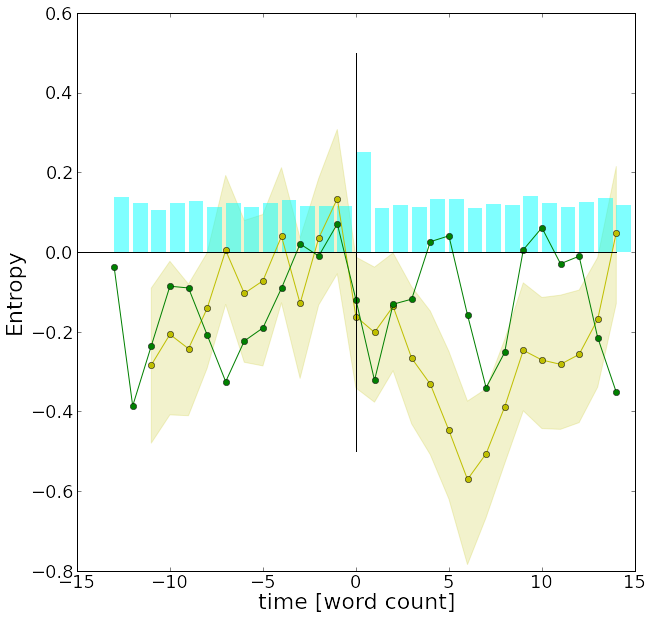

In [78]:
token = '8db55'
treatment = 6

print token,Jlist

J = allData[token]['J']
Jlist = allData[token]['Jlist']
print Jlist[treatment]
words = np.array(J[Jlist[treatment]]['exp']['words'])[:-1]
lWords = np.array([len(word) for word in words])
rate = 1./np.array(J[Jlist[treatment]]['exp']['rate'])
dRate = np.diff(rate)/rate[:-1]*100#[1 + deque:]
sEntropy = np.array(J[Jlist[treatment]]['exp']['normalized_entropy'][:-1])

pl.figure(1,(10,10))

entropyChangeAroundLargeWords(lWords,sEntropy,minWlength = 9,maxWlength= 30, confinter = 10,plot=True)


x0 = np.arange(-15,15)
y0 = np.zeros_like(x0)
pl.plot(x0,y0,'k-')

yVert = np.linspace(-0.5,0.5,10)
xVert = np.zeros_like(yVert)
pl.plot(xVert,yVert,'k-')

pl.savefig(rootDir  + "figures/" + "entropy_vicinity.eps")


#print np.argwhere(p < 0.15) - span
#icmin = np.argmin(p)
#print icmin - span,rho[icmin],p[icmin]


mw = np.mean(lWords)
minPerc,maxPerc =  np.percentile(lWords,[20,80])

smallWordIndex = np.argwhere(lWords < minPerc)
largeWordIndex = np.argwhere(lWords > maxPerc)

sSmall = sEntropy[smallWordIndex]
sLarge = sEntropy[largeWordIndex]

print "entropy small words: ",np.mean(sSmall)
print "entropy large words: ",np.mean(sLarge)

In [235]:
simV = []
simT = []

for i,line1 in enumerate(data):
    #print "\n"
    v1 = line1[2]
    t1 = line1[3]

    for j,line2 in enumerate(data):
        if j >= i:
            continue
        
        if line1[0] == line2[0]:
            continue
        
        if line1[1] != line2[1]:
            continue
            
        v2 = line2[2]
        t2 = line2[3]
        #print v2
        
        simv = np.sum(v1*v2) / (np.sqrt(np.sum(v1**2))*np.sqrt(np.sum(v2**2)))
        simText = np.sum(t1*t2) / (np.sqrt(np.sum(t1**2))*np.sqrt(np.sum(t2**2)))
        
        simV.append(simv)
        simT.append(simText)
        
        print "[%s,%s] [%s,%s] = %.4f (%.4f)"%(line1[0],line1[1],line2[0],line2[1],simv,simText)

[68cdc,We] [8db55,We] = 0.9519 (1.0000)
[68cdc,In] [8db55,In] = 0.9266 (1.0000)
[68cdc,Each] [8db55,Each] = 0.9114 (1.0000)
[68cdc,The] [8db55,The] = 0.9548 (1.0000)
[92647,The] [8db55,The] = 0.9254 (1.0000)
[92647,The] [68cdc,The] = 0.9789 (1.0000)
[92647,In] [8db55,In] = 0.9438 (1.0000)
[92647,In] [68cdc,In] = 0.9847 (1.0000)
[92647,Indian] [8db55,Indian] = 0.9490 (1.0000)
[ac3ef,We] [8db55,We] = 0.9493 (1.0000)
[ac3ef,We] [68cdc,We] = 0.9769 (1.0000)
[ac3ef,On] [8db55,On] = 0.9487 (1.0000)
[ac3ef,In] [8db55,In] = 0.9461 (1.0000)
[ac3ef,In] [68cdc,In] = 0.9913 (1.0000)
[ac3ef,In] [92647,In] = 0.9926 (1.0000)
[f62ff,We] [8db55,We] = 0.9252 (1.0000)
[f62ff,We] [68cdc,We] = 0.9732 (1.0000)
[f62ff,We] [ac3ef,We] = 0.9830 (1.0000)
[f62ff,Each] [8db55,Each] = 0.9107 (1.0000)
[f62ff,Each] [68cdc,Each] = 0.9905 (1.0000)
[f62ff,On] [8db55,On] = 0.9252 (1.0000)
[f62ff,On] [ac3ef,On] = 0.9733 (1.0000)
[29979,We] [8db55,We] = 0.9626 (1.0000)
[29979,We] [68cdc,We] = 0.9932 (1.0000)
[29979,We] [ac

In [229]:
users = np.unique(df[0])
txts = np.unique(df[1])

for u in users:
    for t in txts:
        #try:
        vector = df[(df[0] == u) & (df[1] == t)][2]
        
        if len(vector) >0:
            print u,t,vector
        
        #except:
        #    continue

29979 Each 7    [0, 0, 0, 0, 11, 21, 47, 38, 46, 54, 65, 38, 3...
Name: 2, dtype: object
29979 We 6    [0, 0, 0, 2, 12, 27, 45, 42, 58, 90, 92, 59, 3...
Name: 2, dtype: object
2cd39 In 10    [0, 0, 0, 11, 17, 48, 65, 28, 36, 108, 142, 58...
Name: 2, dtype: object
5f615 Each 13    [0, 0, 0, 6, 11, 35, 39, 24, 31, 67, 81, 29, 2...
Name: 2, dtype: object
5f615 Indian 14    [0, 0, 0, 14, 21, 82, 73, 30, 68, 125, 220, 92...
Name: 2, dtype: object
68cdc Each 2    [0, 0, 0, 0, 5, 14, 31, 37, 54, 75, 74, 47, 45...
Name: 2, dtype: object
85d6e Each 11    [0, 0, 0, 2, 11, 24, 38, 31, 37, 70, 96, 41, 2...
Name: 2, dtype: object
85d6e In 12    [0, 0, 0, 2, 21, 44, 45, 53, 53, 92, 128, 78, ...
Name: 2, dtype: object
8db55 Indian 1    [0, 0, 0, 19, 24, 88, 80, 36, 61, 143, 215, 78...
Name: 2, dtype: object
8db55 We 0    [0, 0, 0, 14, 24, 48, 35, 35, 40, 93, 123, 48,...
Name: 2, dtype: object
92647 The 3    [0, 0, 0, 0, 8, 29, 43, 56, 53, 70, 96, 54, 52...
Name: 2, dtype: object
94460 In 15    [0, 0,

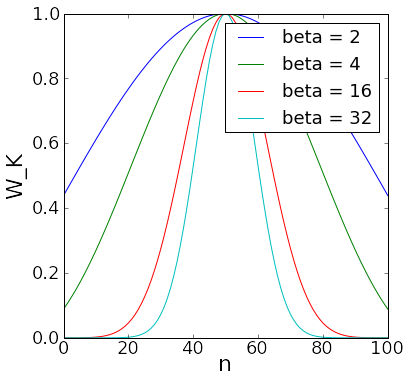

In [156]:
import numpy
import pylab

beta = [2,4,16,32]

pylab.figure()
for b in beta:
 w = numpy.kaiser(101,b) 
 pylab.plot(range(len(w)),w,label="beta = "+str(b))
pylab.xlabel('n')
pylab.ylabel('W_K')
pylab.legend()
pylab.show()

In [192]:
def smooth(x,beta):
 """ kaiser window smoothing """
 window_len=21
 # extending the data at beginning and at the end
 # to apply the window at the borders
 s = numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
 w = numpy.kaiser(window_len,beta)
 y = numpy.convolve(w/w.sum(),s,mode='valid')
 return y[10:len(y)-10]

In [150]:
N = 100
sigma = 1

dx = float(3940-3930)/N
gx = np.arange(-3*sigma, 3*sigma, dx)
gaussian = np.exp(-(gx/sigma)**2/2)
#result = np.convolve(original_curve, gaussian, mode="full")

Ohmconnect 561 4.0 4.81639928699
8db55 05_RSVP_cst 0 -0.14482791616 0.463657505436 intercept= 0.0190, slope= -0.0410 (p-value=0.17)
emojiShortened 383 4.0 5.00783289817
8db55 06_RSVP_bsrPlus 0 -0.16556001016 -8.0665104833 intercept= -0.1107, slope= -0.0137 (p-value=0.62)
marsOneShortened 646 4.0 4.96594427245
8db55 07_RSVP_bsrMinus 0 -0.0106596689243 4.37274824396 intercept= -0.1250, slope= 0.0286 (p-value=0.24)
indianFood 987 4.0 4.9959473151
8db55 08_RSVP_cst 0 0.0920107907293 8.65937354501 intercept= 0.1710, slope= -0.0197 (p-value=0.40)
Ohmconnect 561 4.0 4.81639928699
68cdc 05_RSVP_bsrMinus 0 0.0324547303956 2.86549986076 intercept= -0.0820, slope= 0.0286 (p-value=0.23)
marsOneShortened 646 4.0 4.96594427245
68cdc 06_RSVP_bsrMinus 0 -0.0124472084962 4.55697155909 intercept= -0.1018, slope= 0.0223 (p-value=0.15)
pressFreedomUS 445 5.0 5.23370786517
68cdc 07_RSVP_cst 0 0.0549896138105 2.63991621126 intercept= -0.1067, slope= 0.0404 (p-value=0.13)
bigPolluter 533 4.0 5.01500938086
68

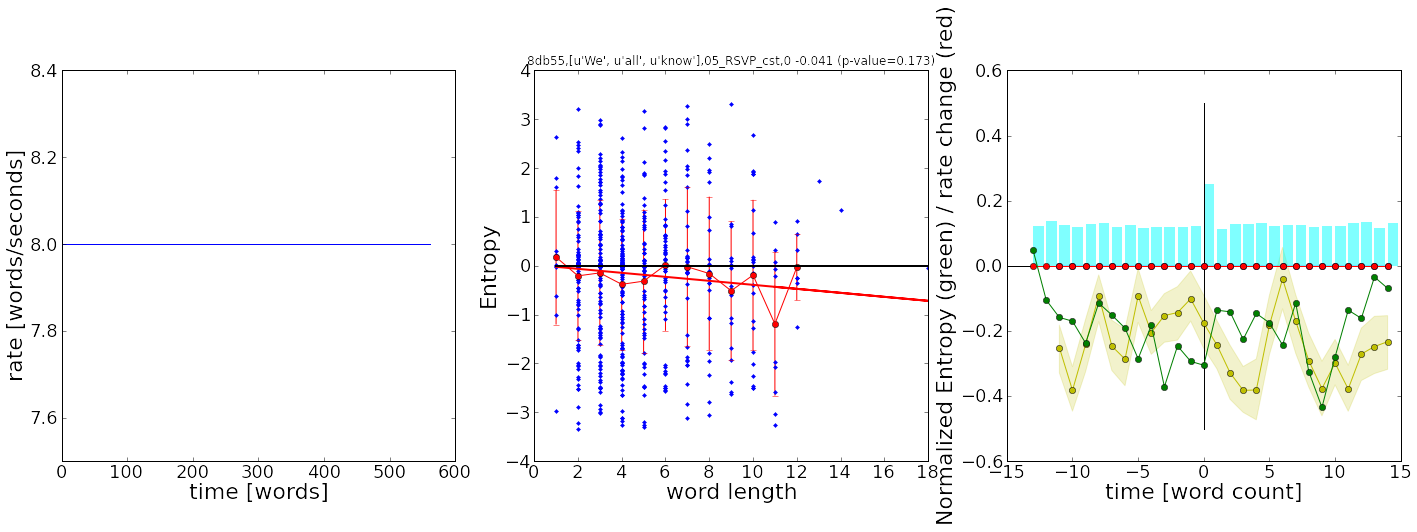

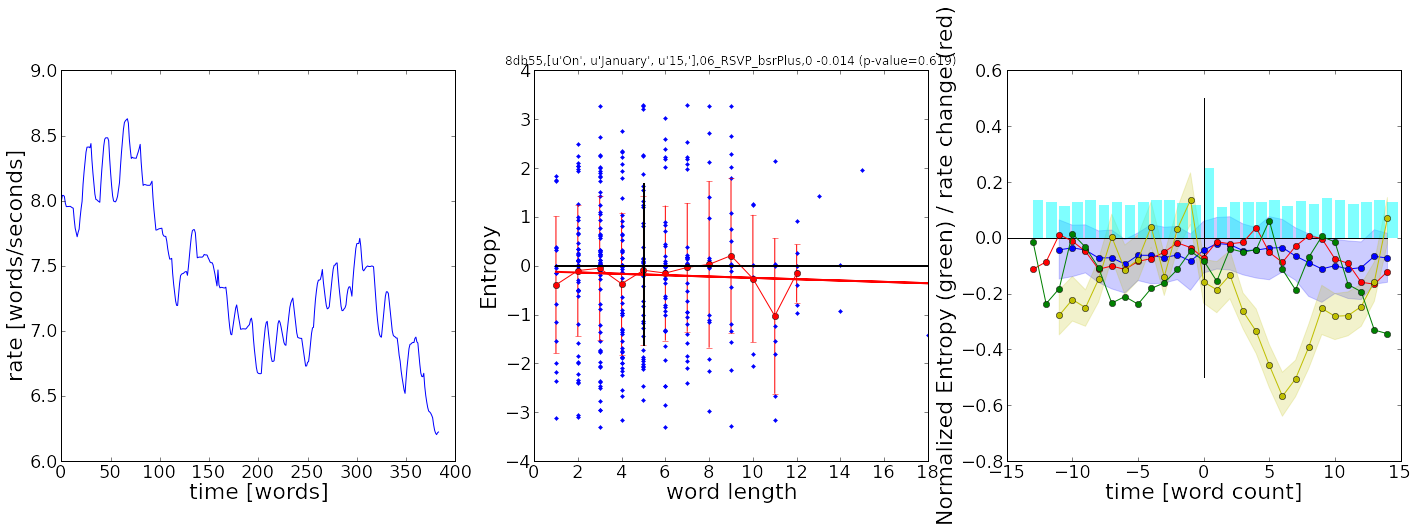

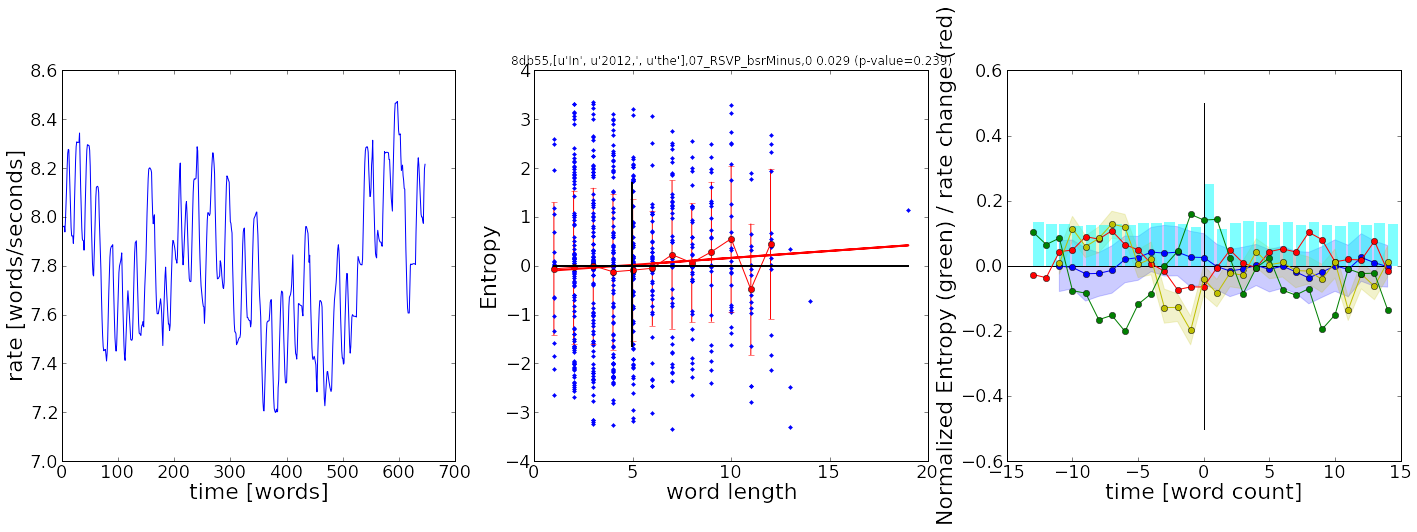

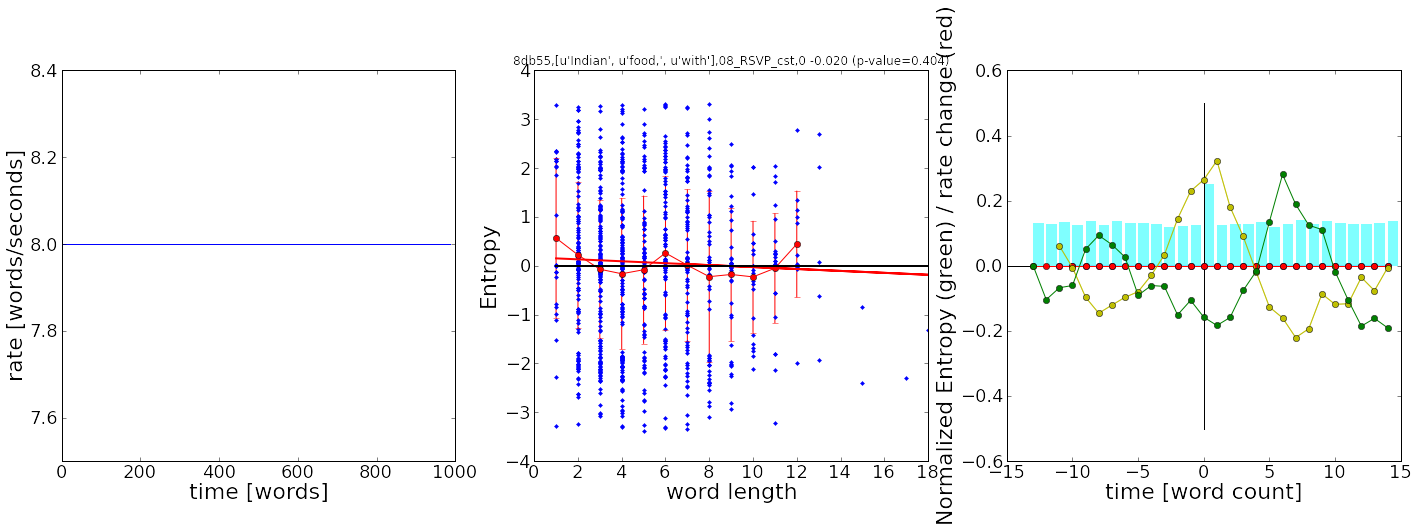

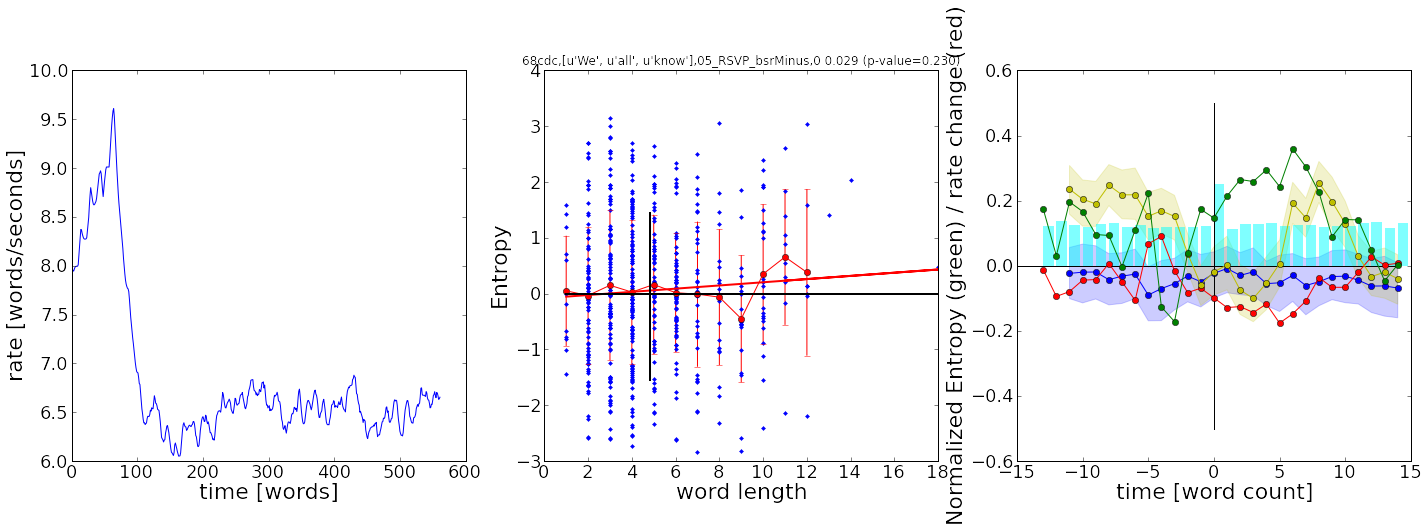

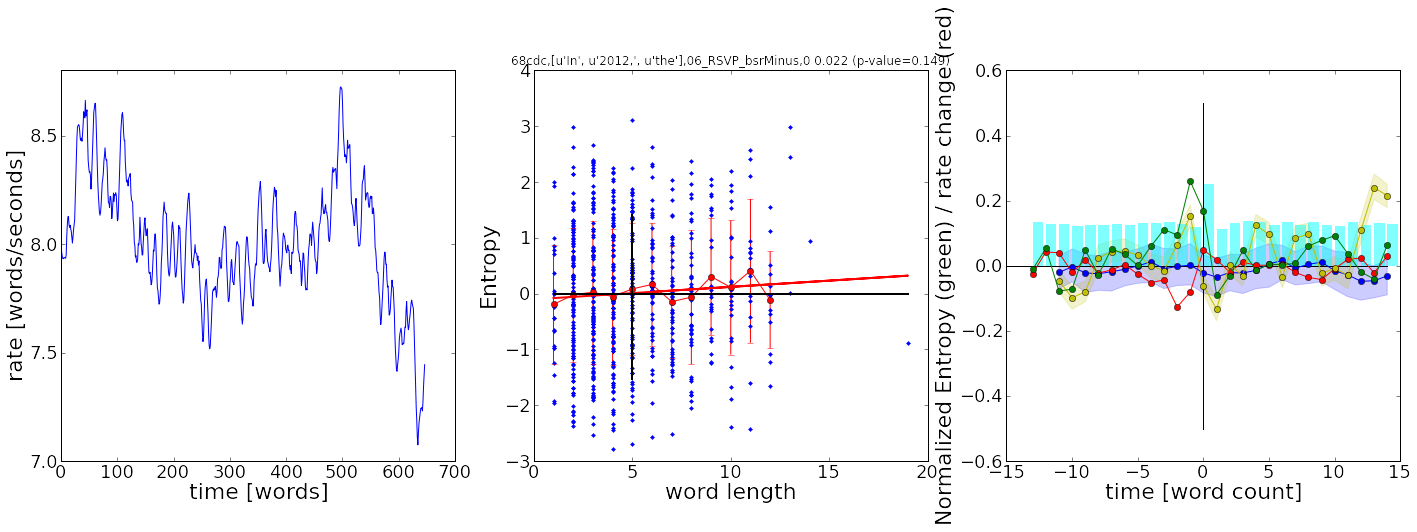

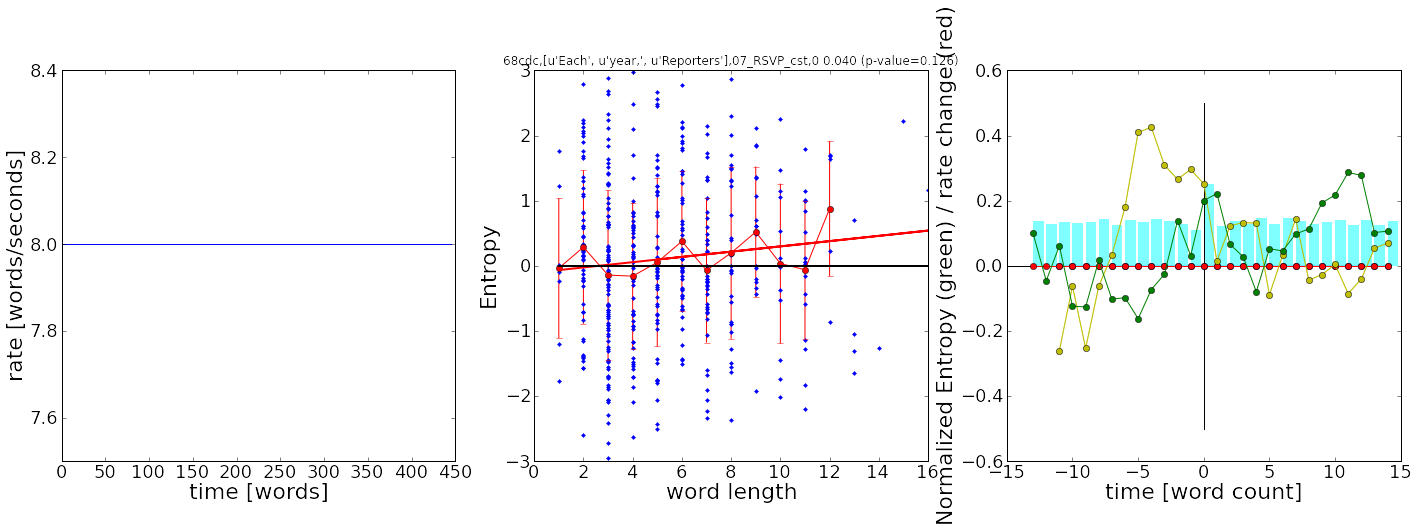

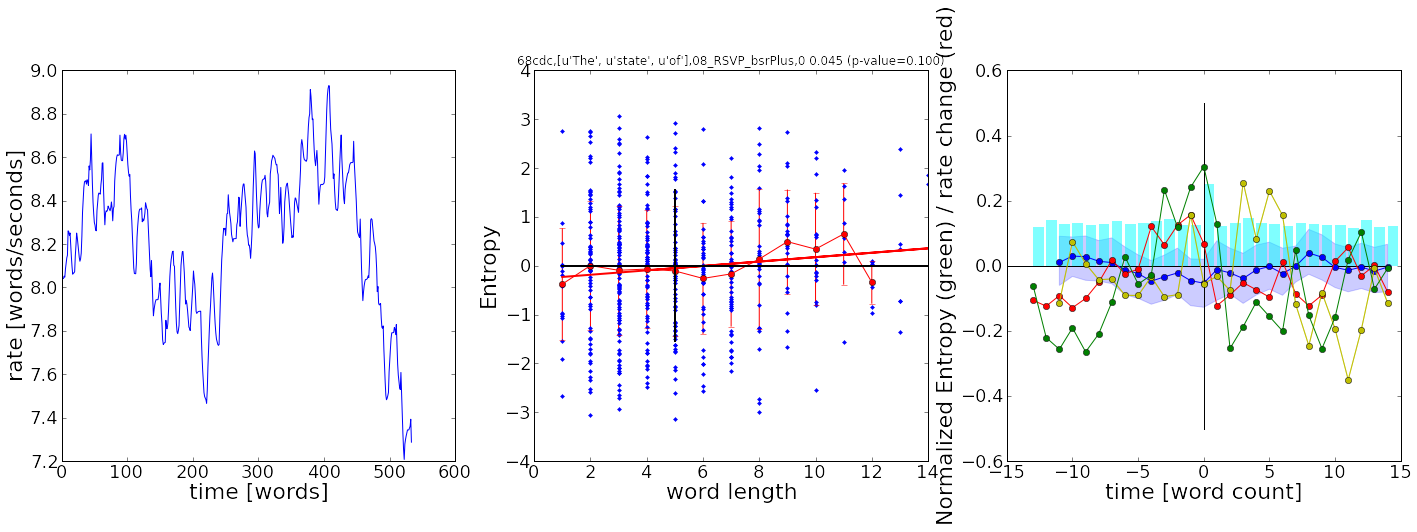

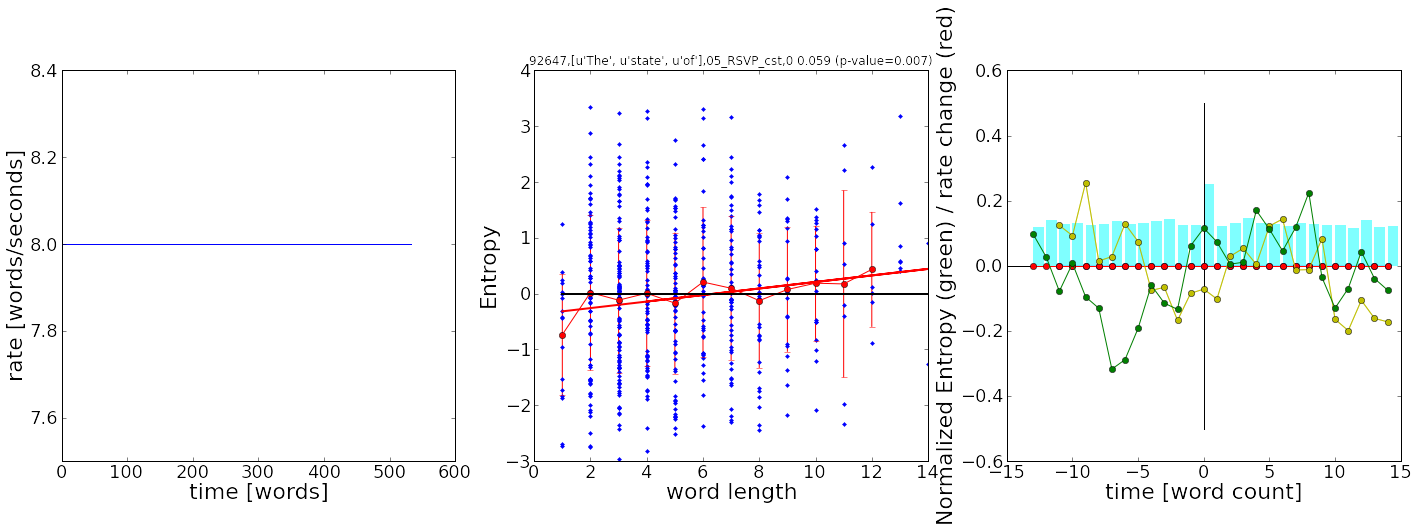

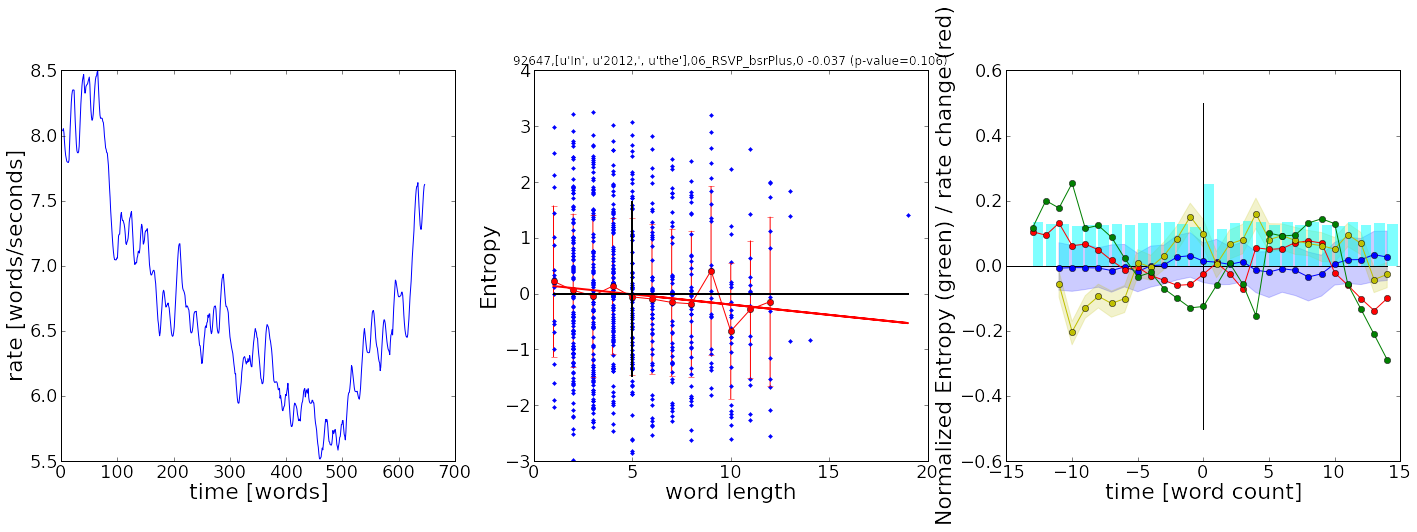

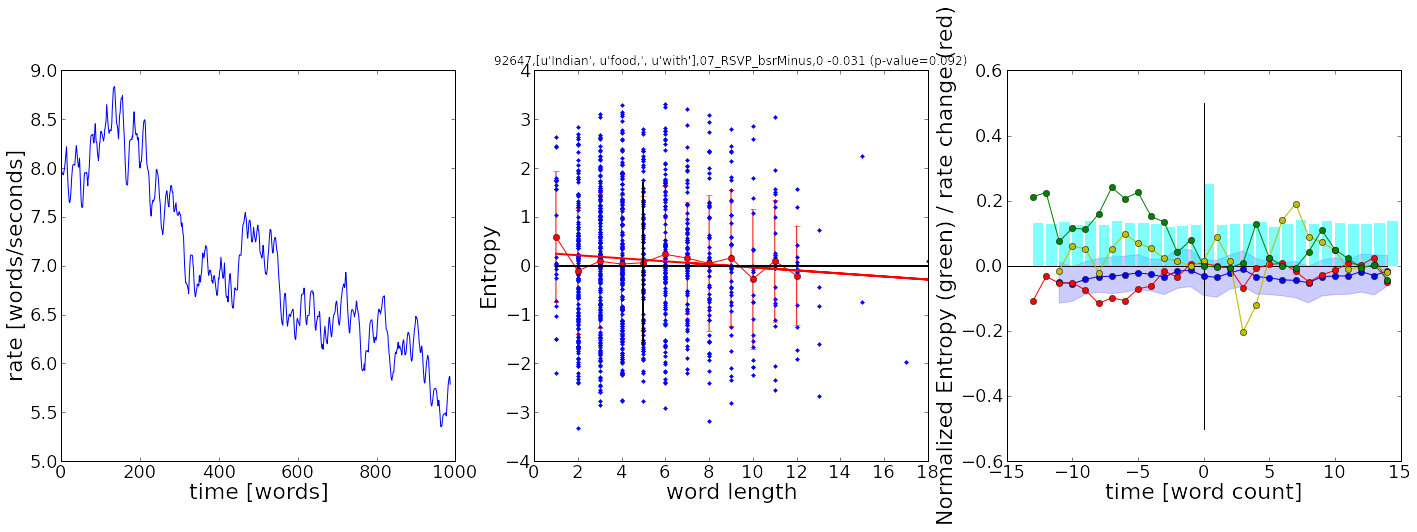

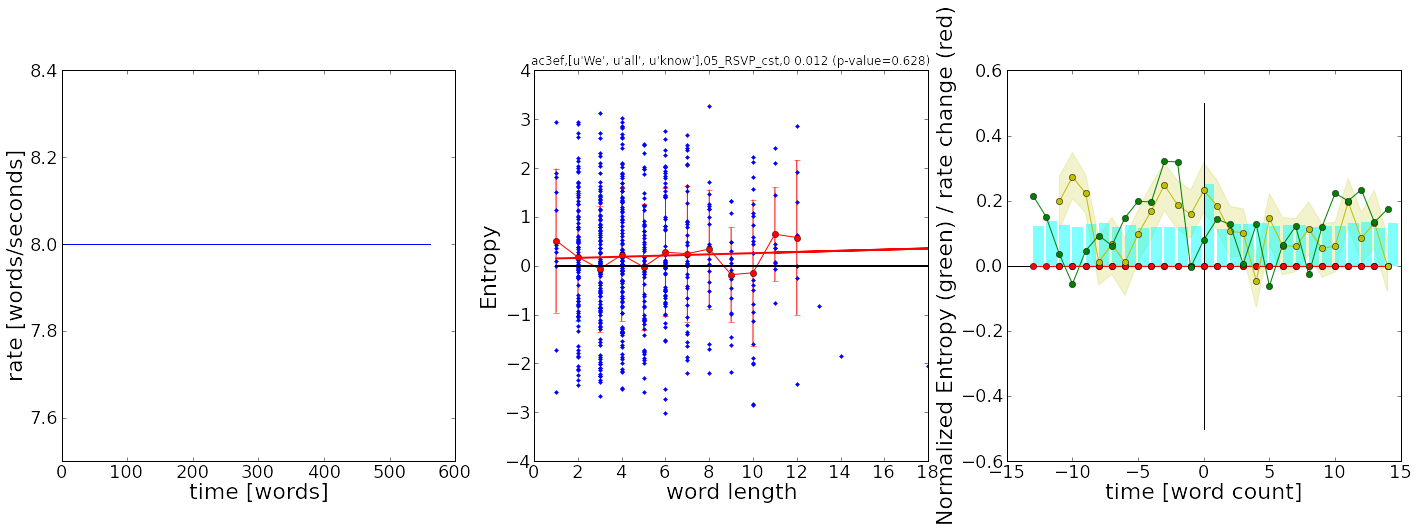

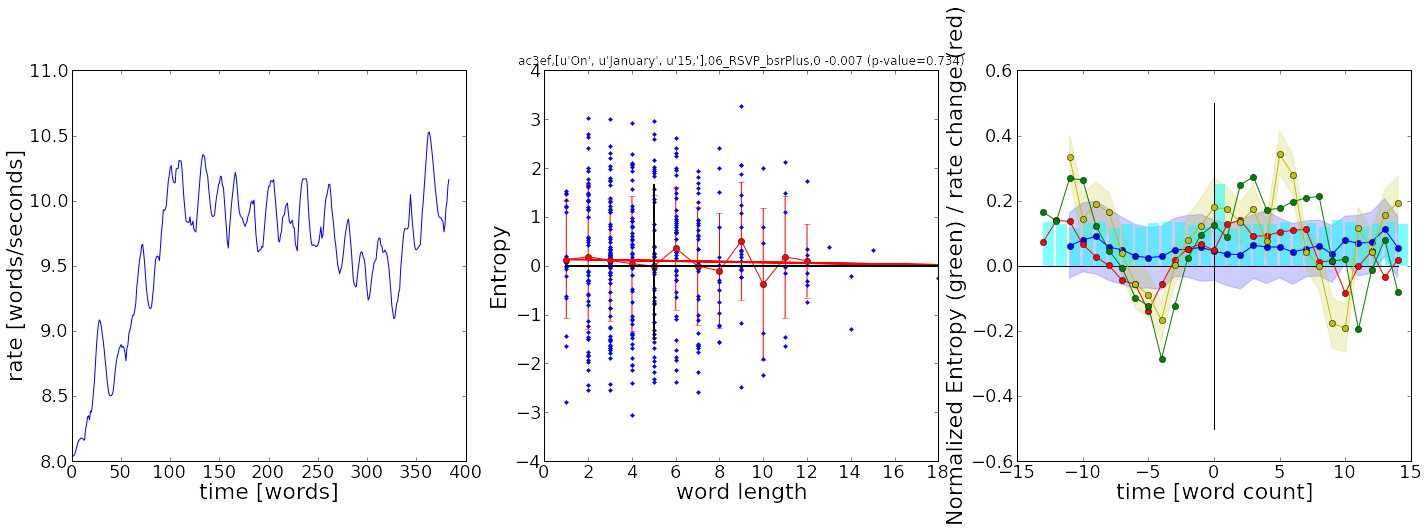

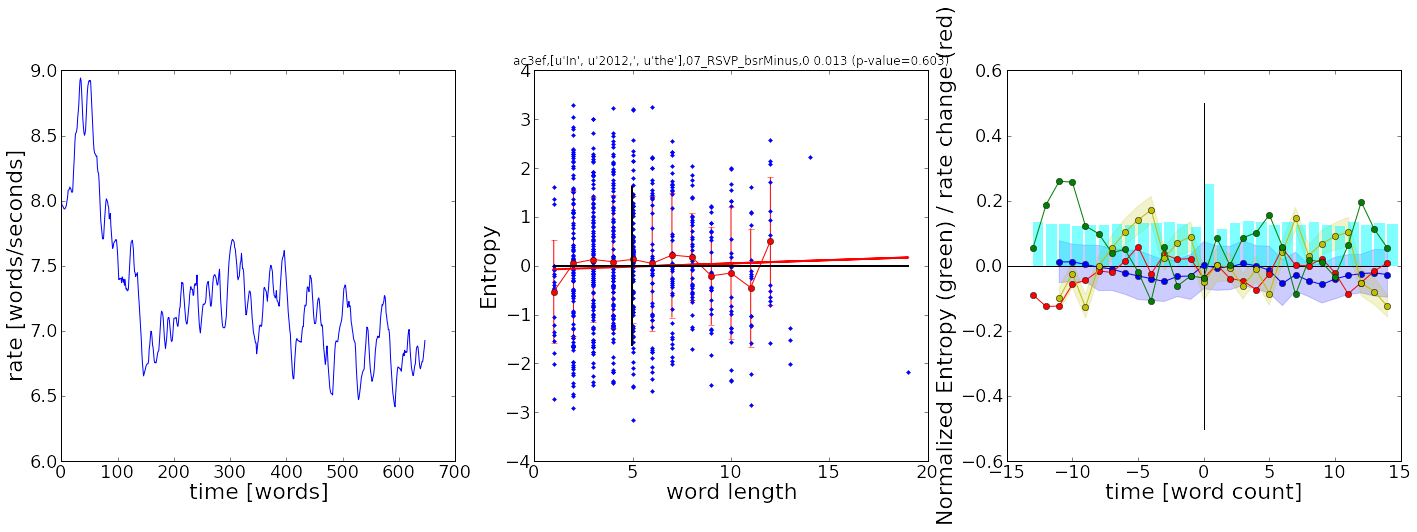

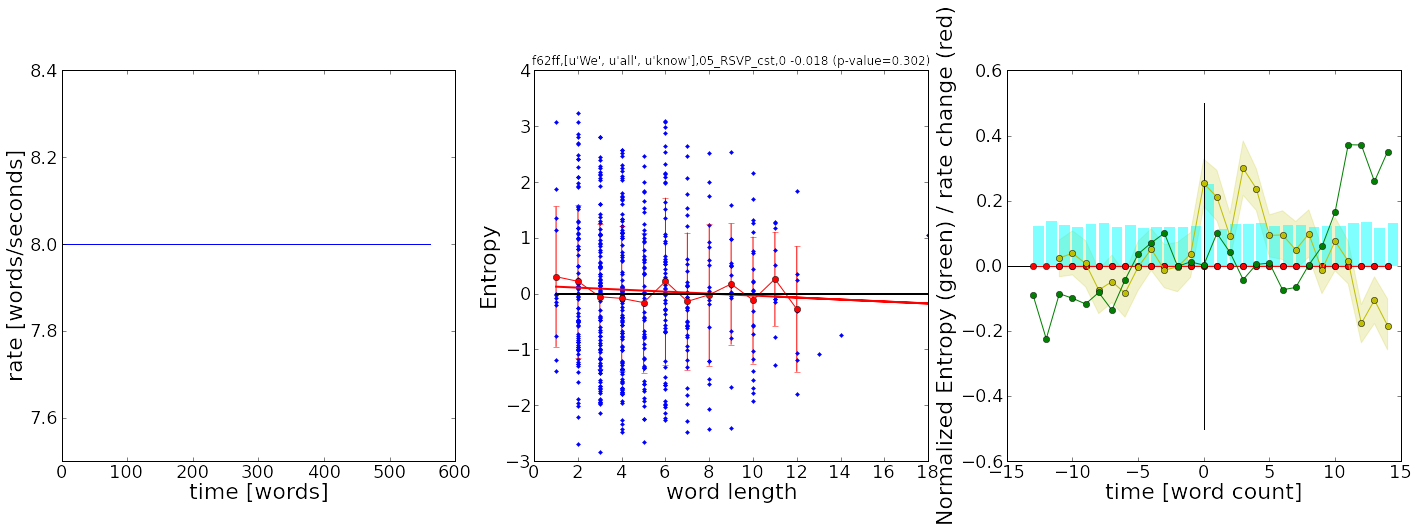

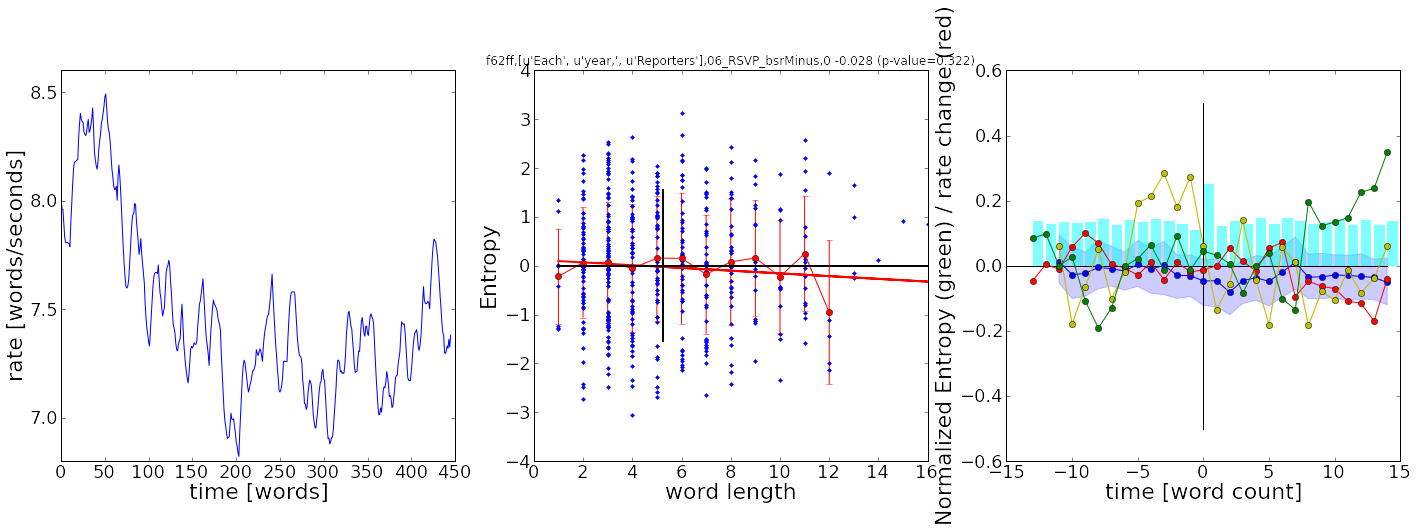

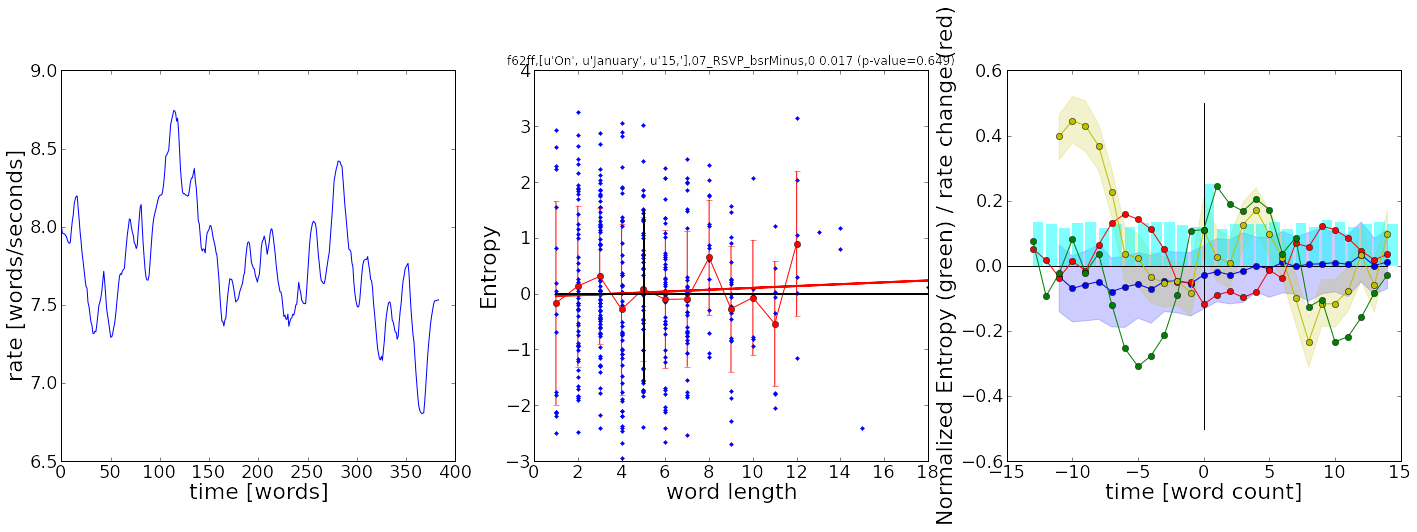

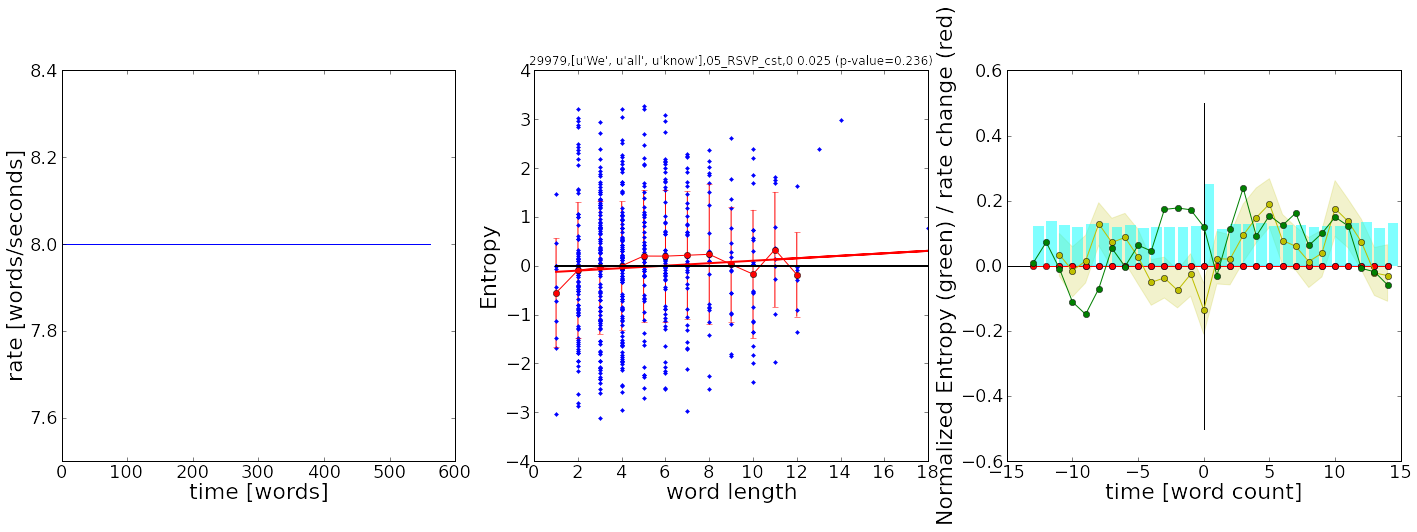

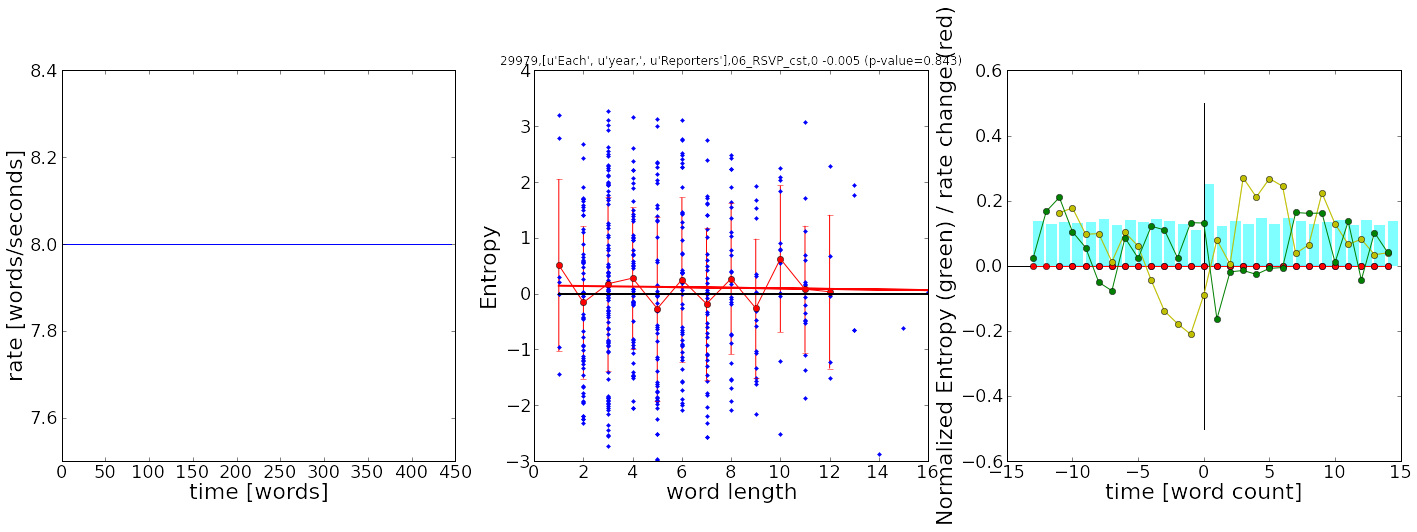

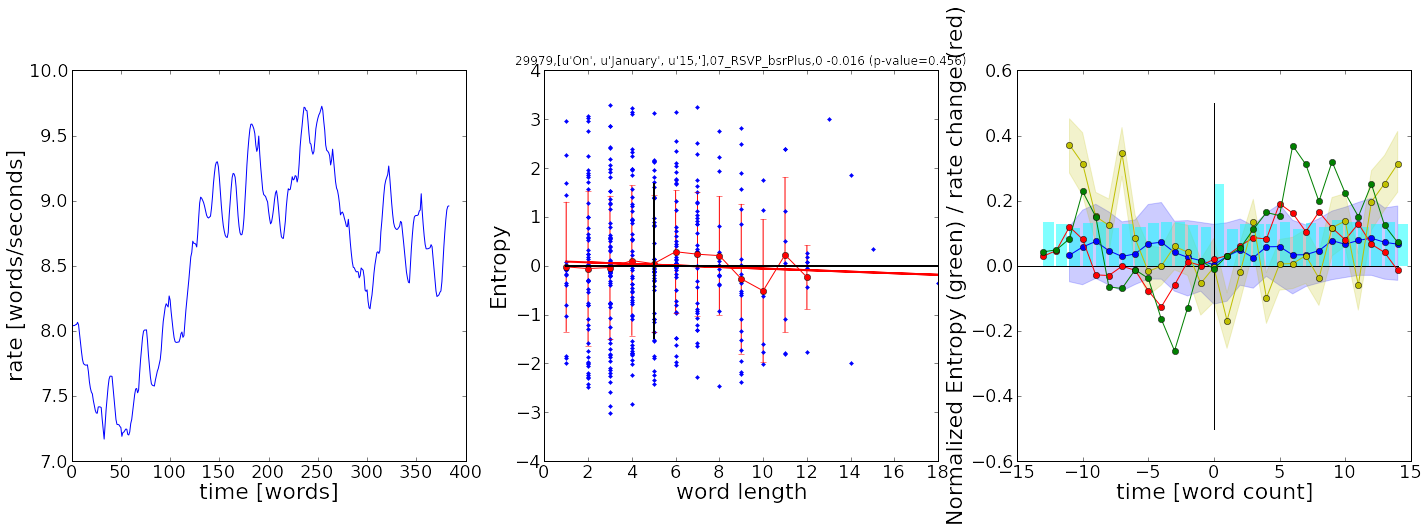

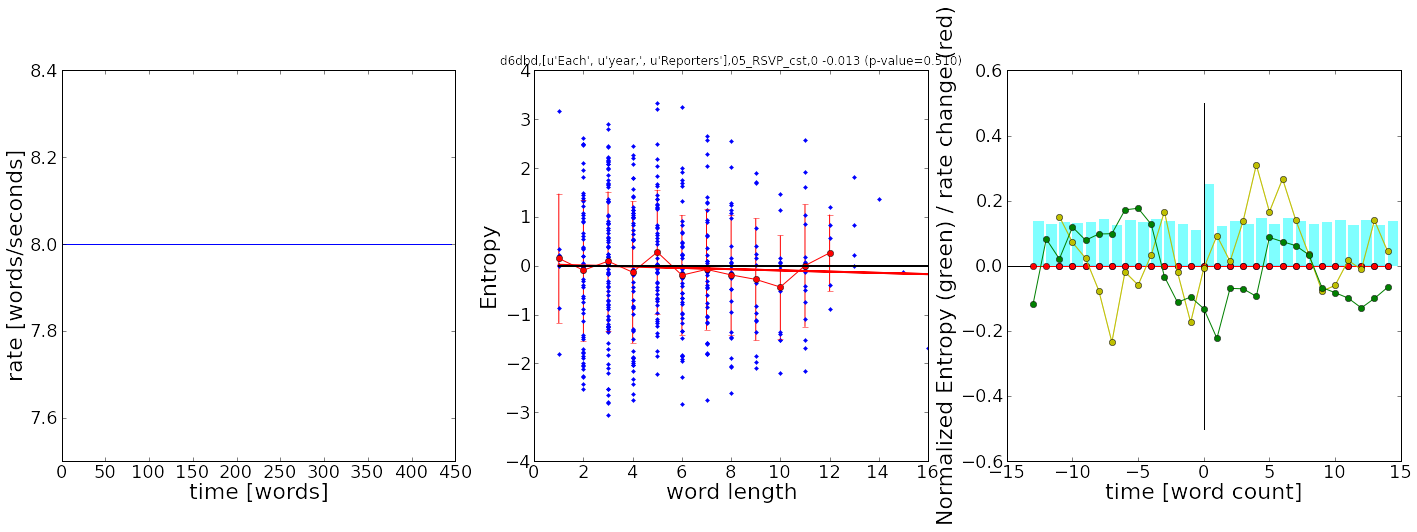

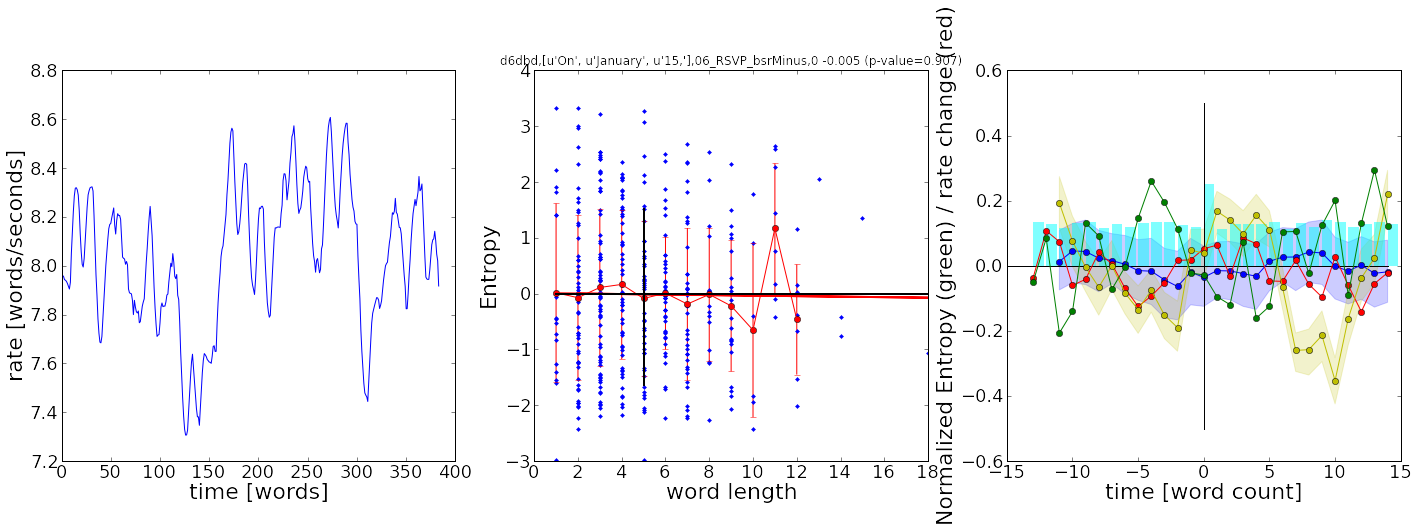

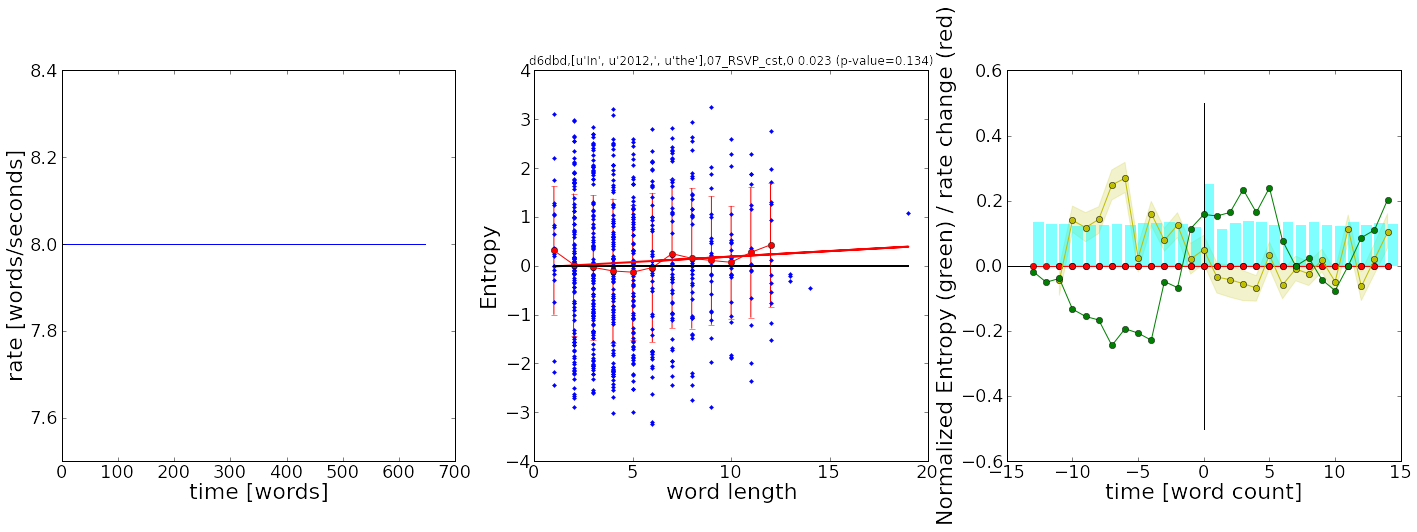

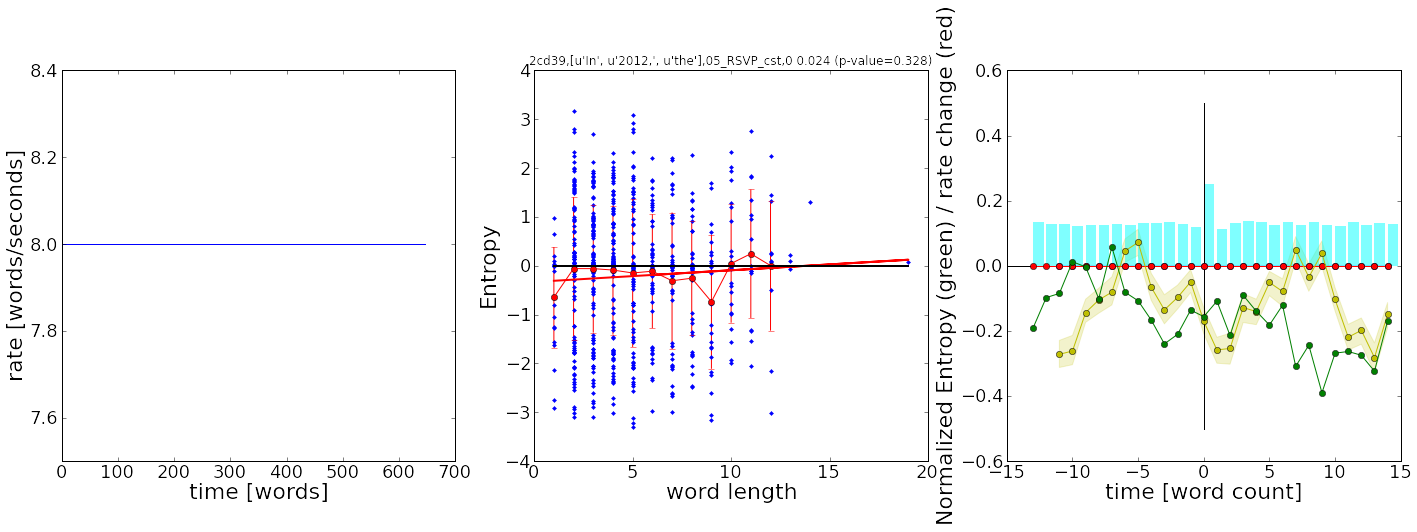

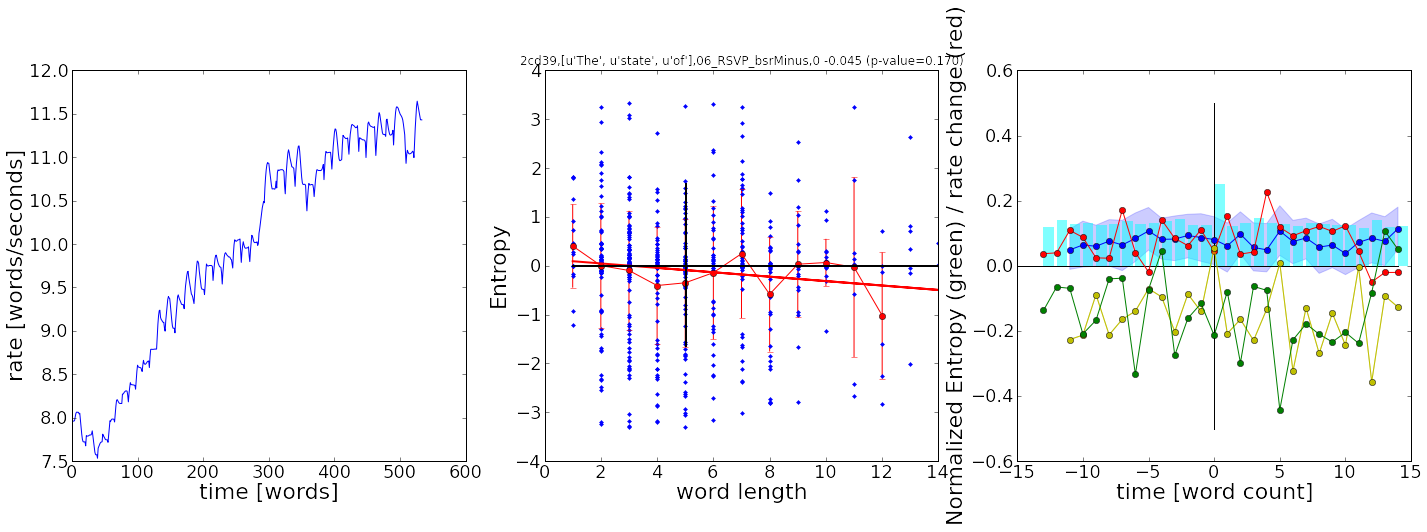

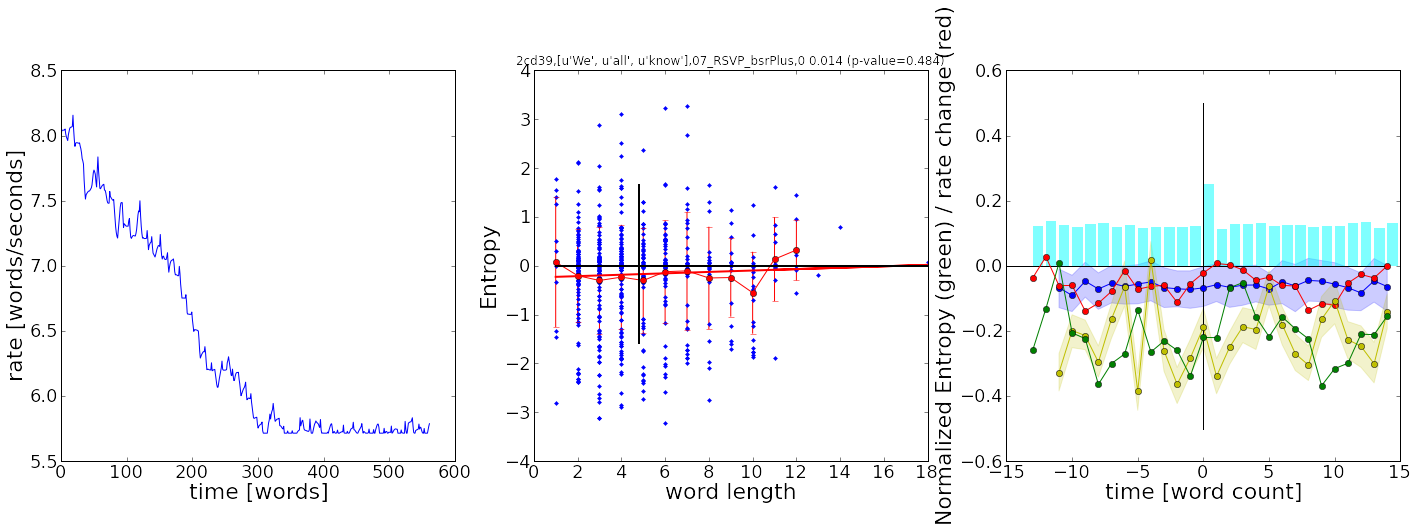

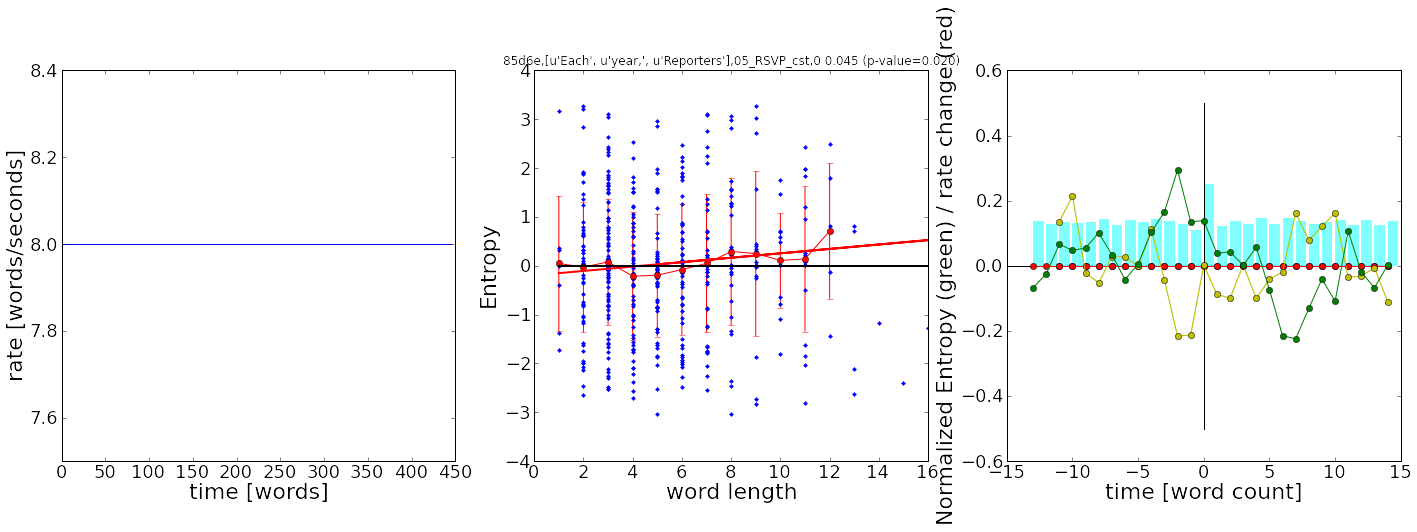

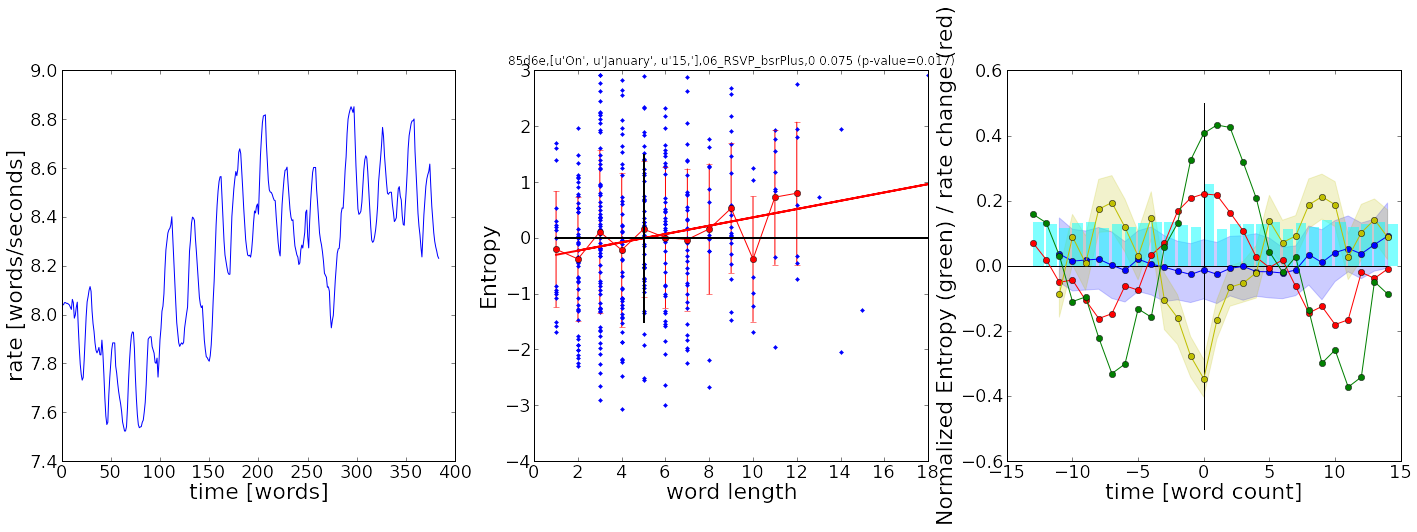

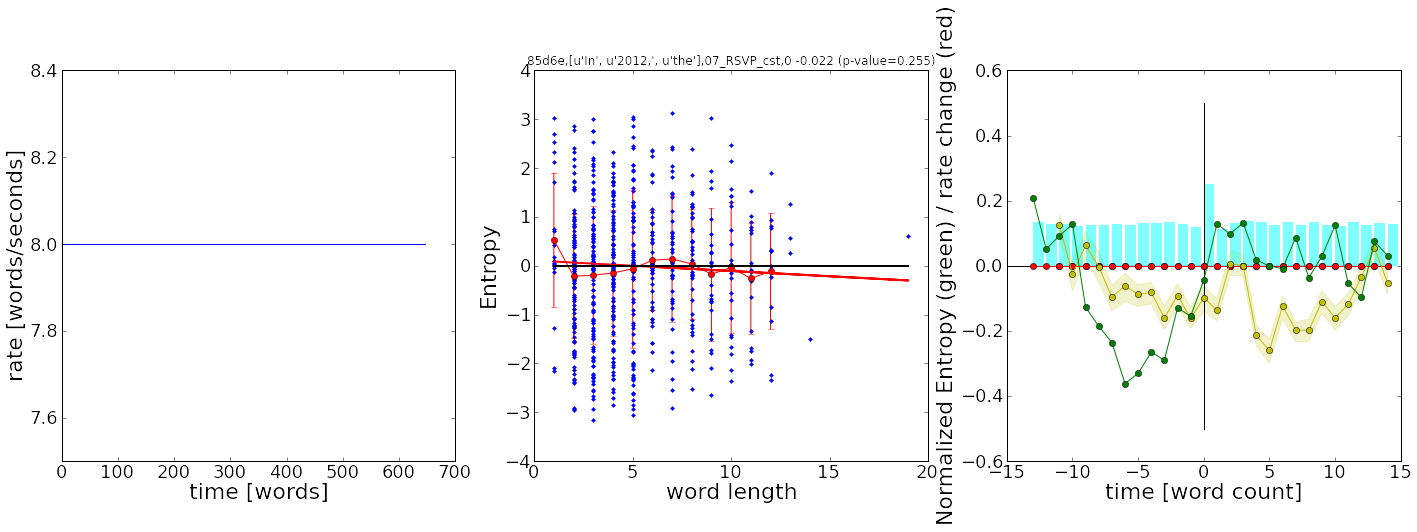

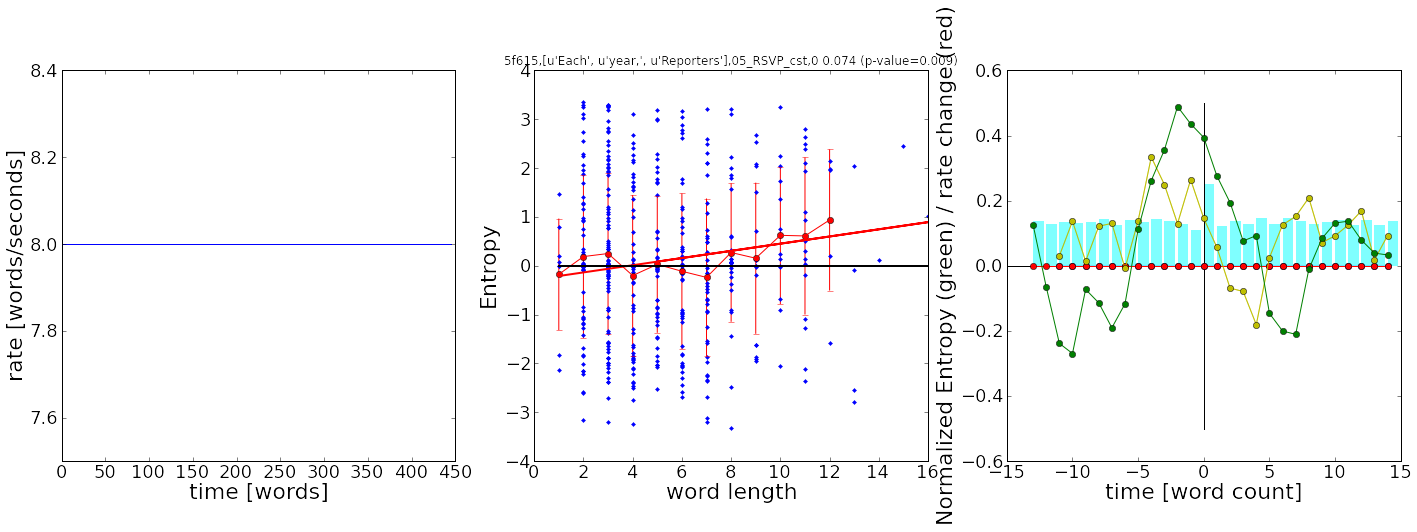

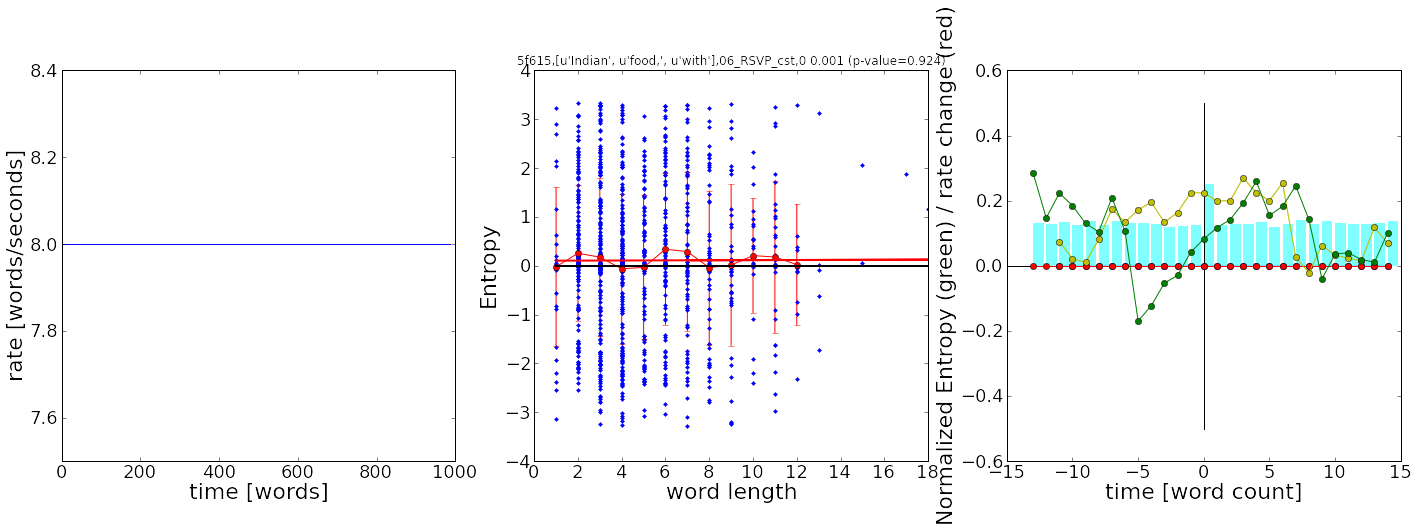

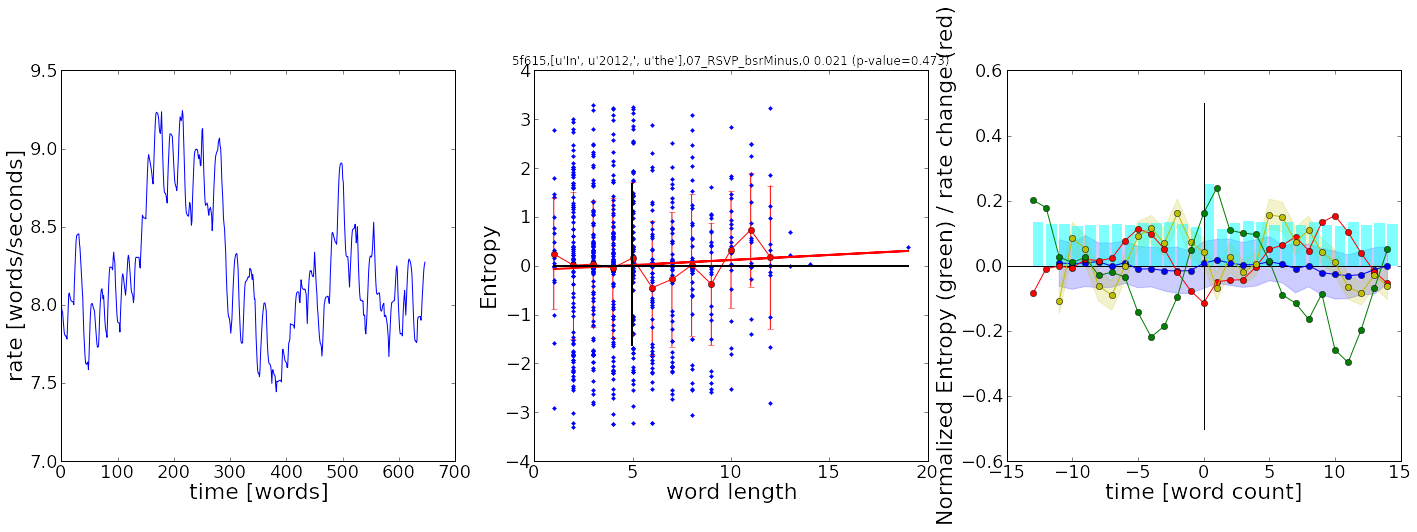

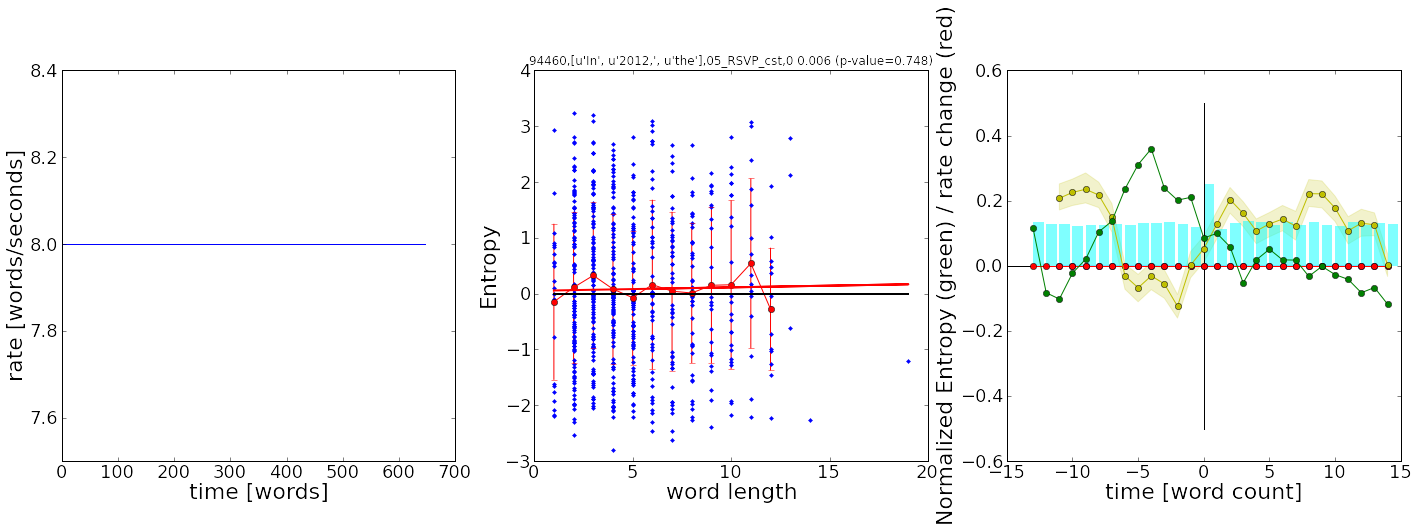

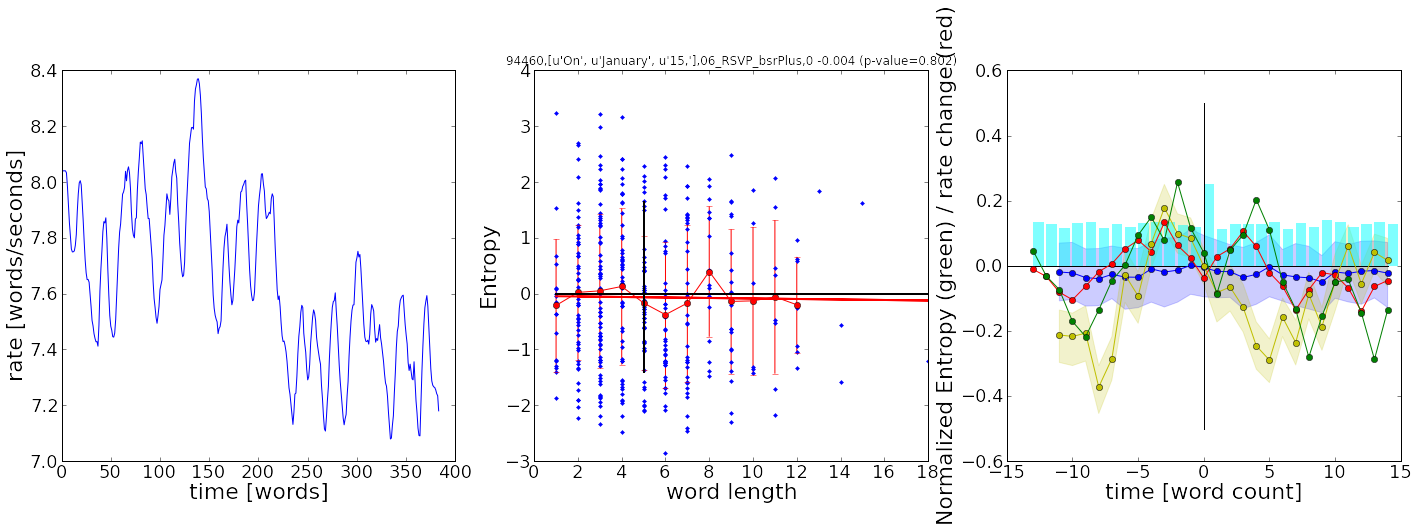

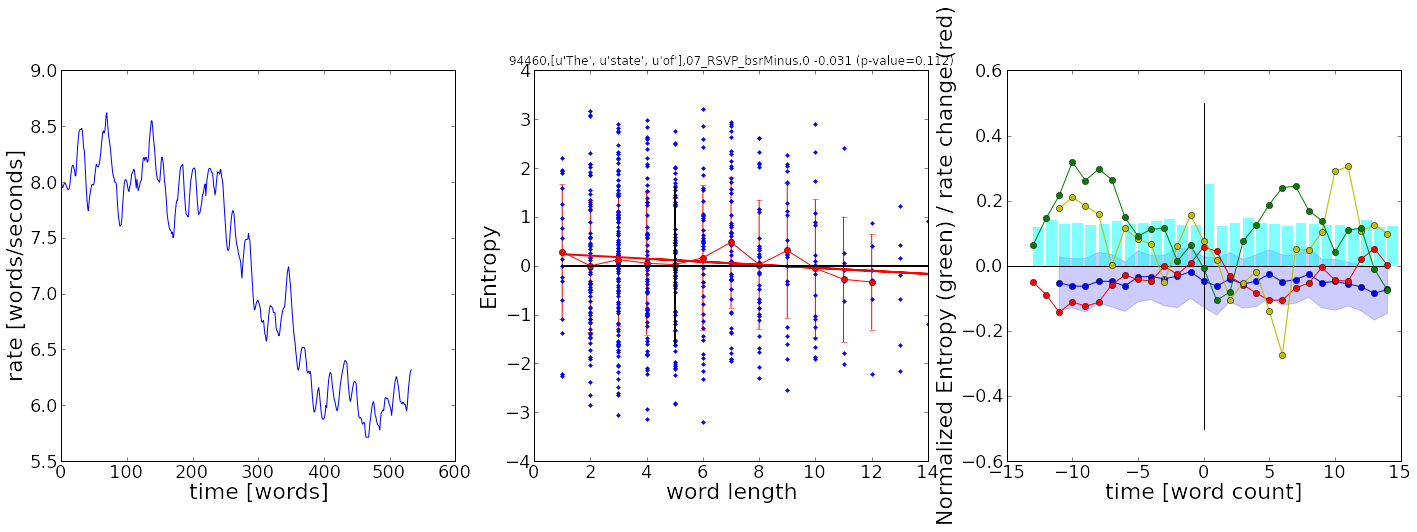

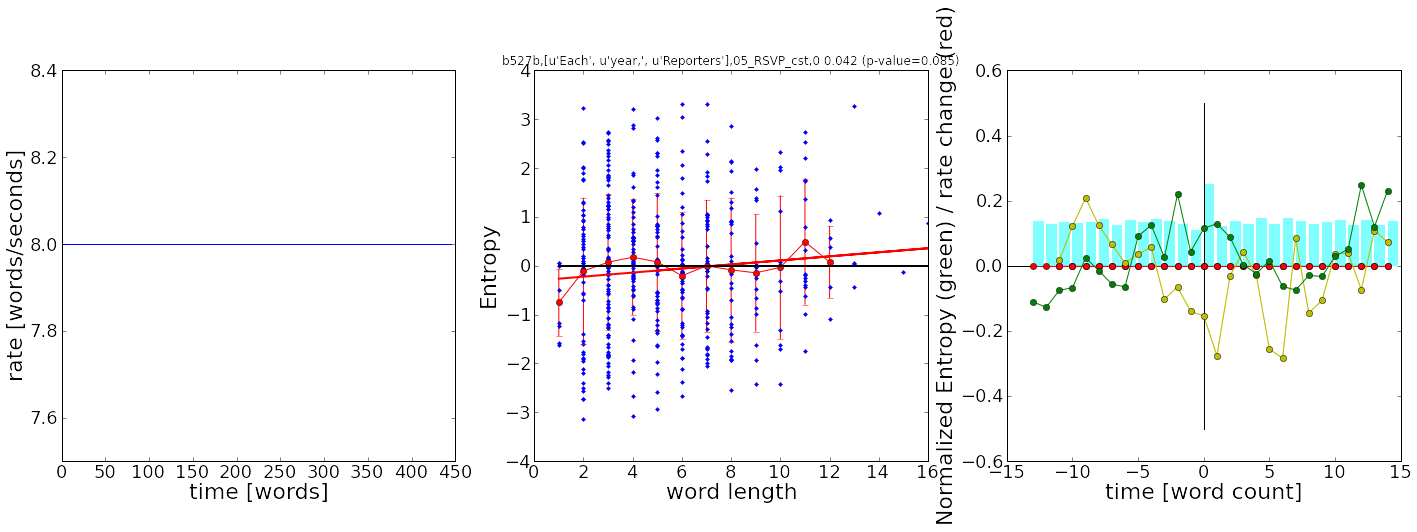

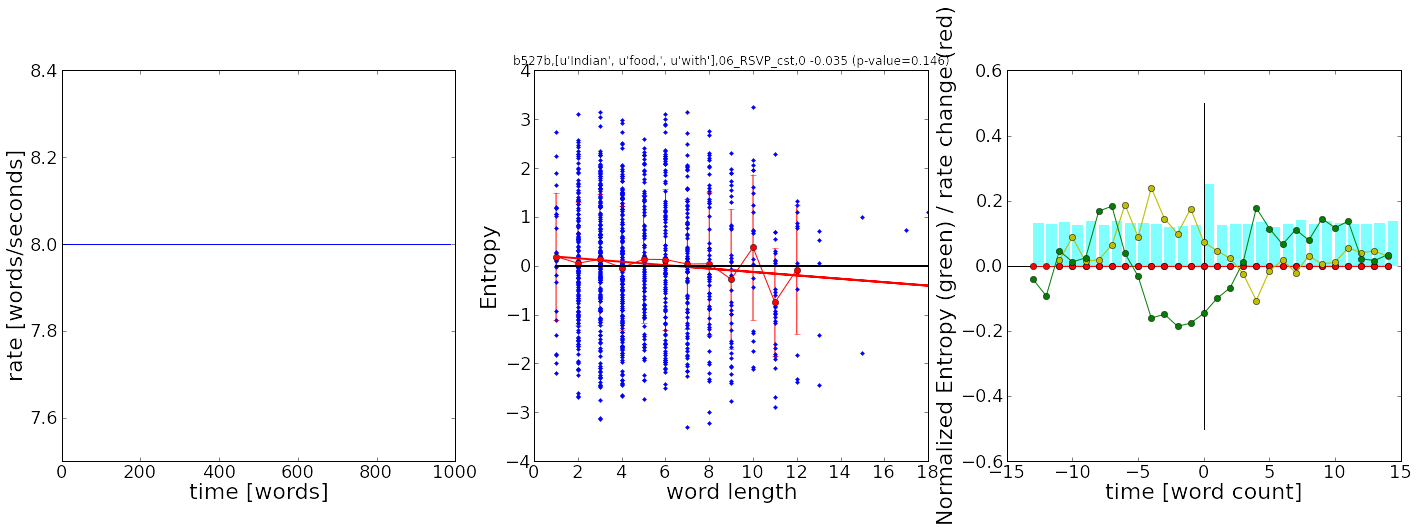

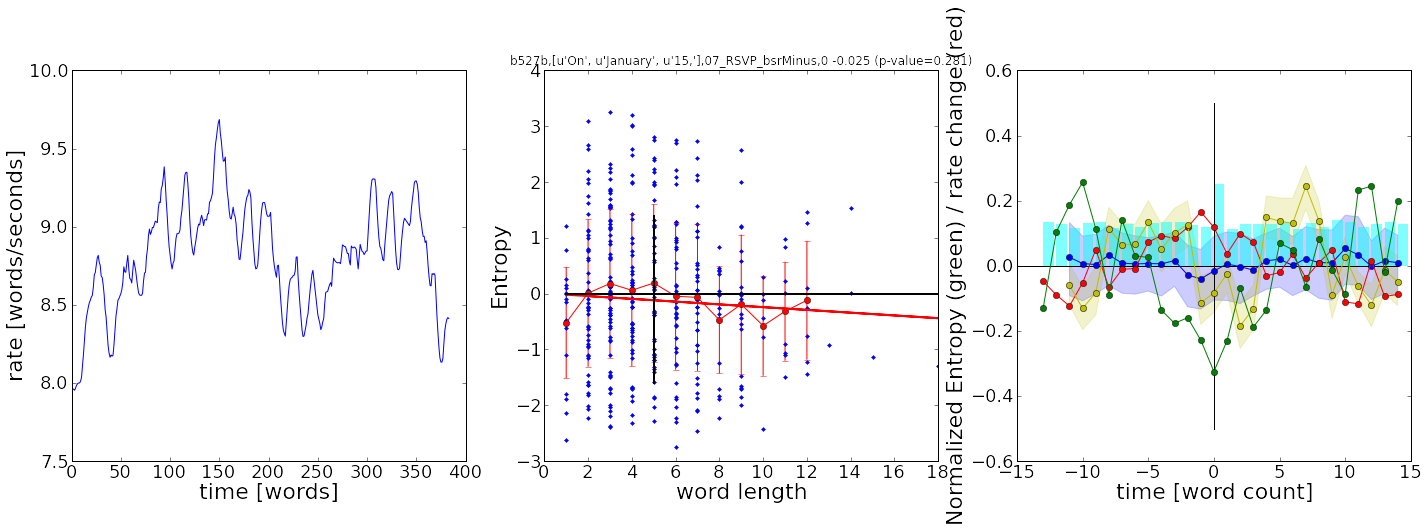

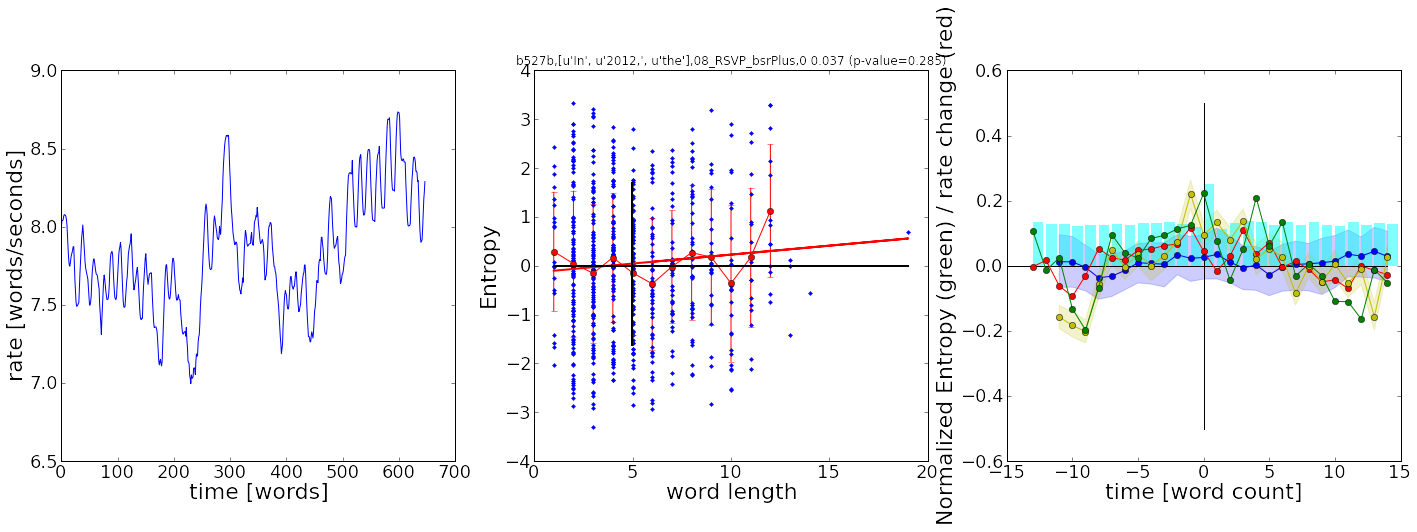

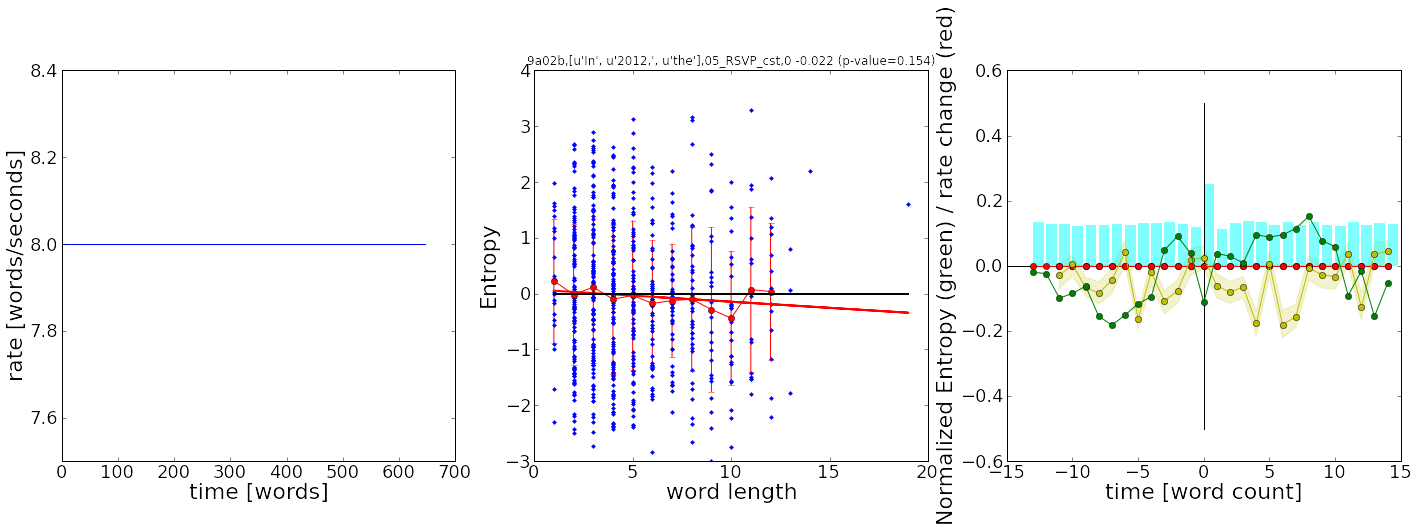

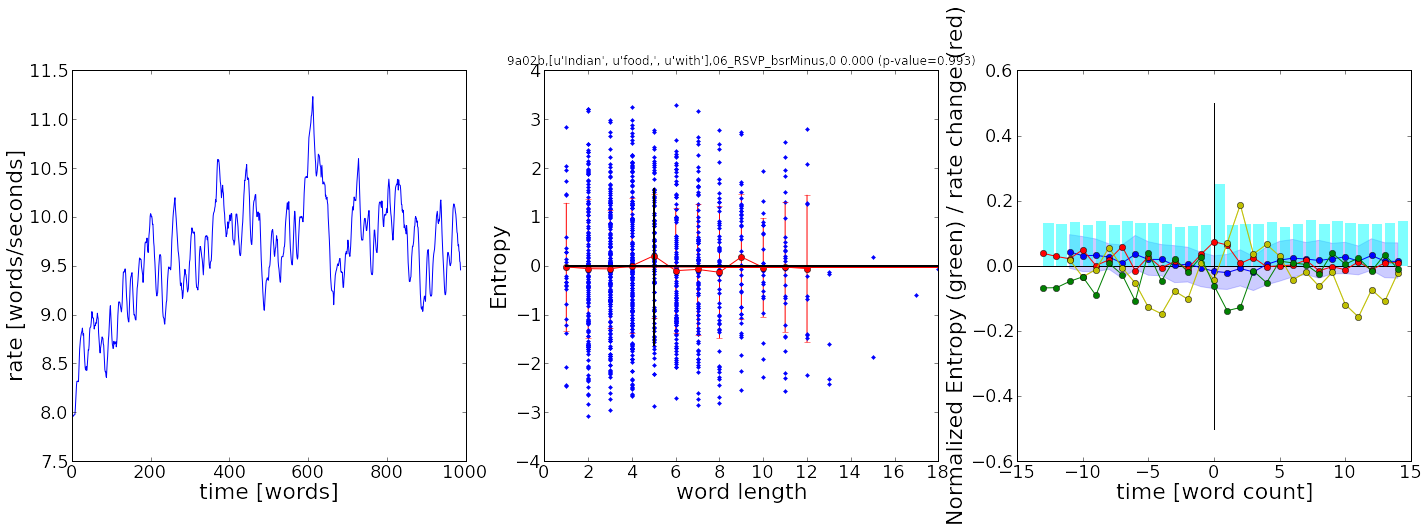

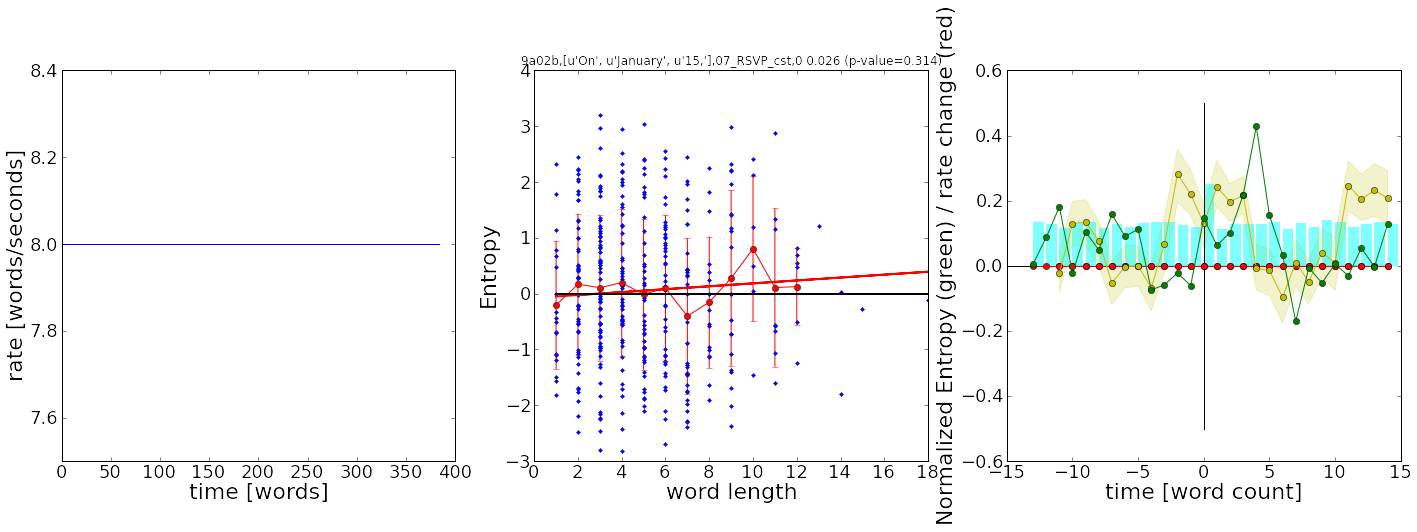

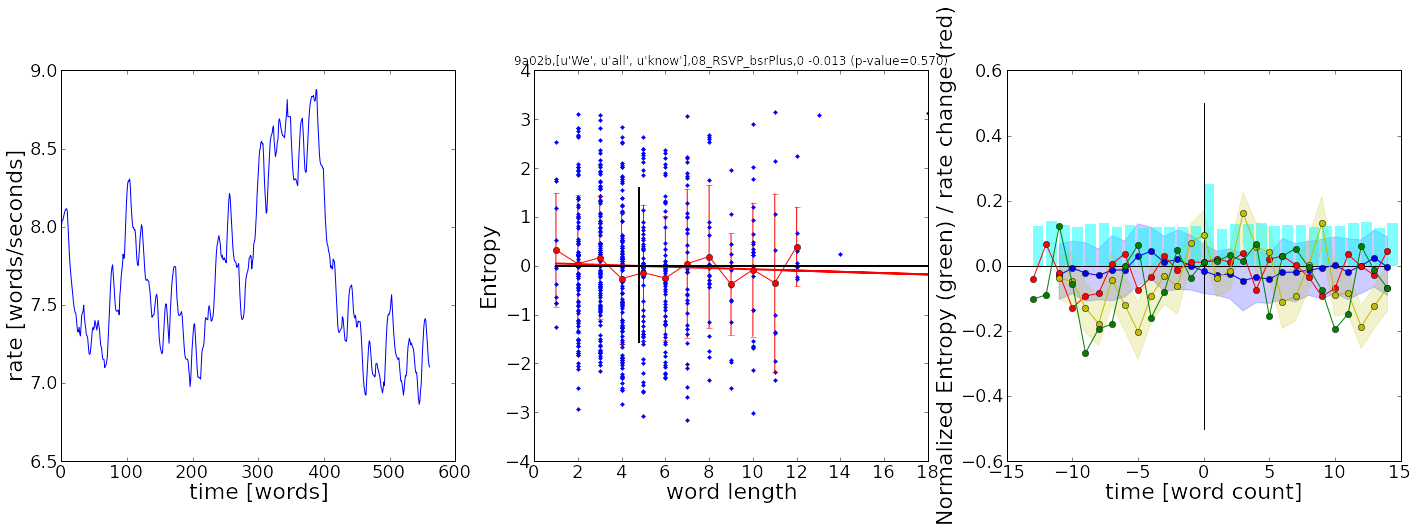

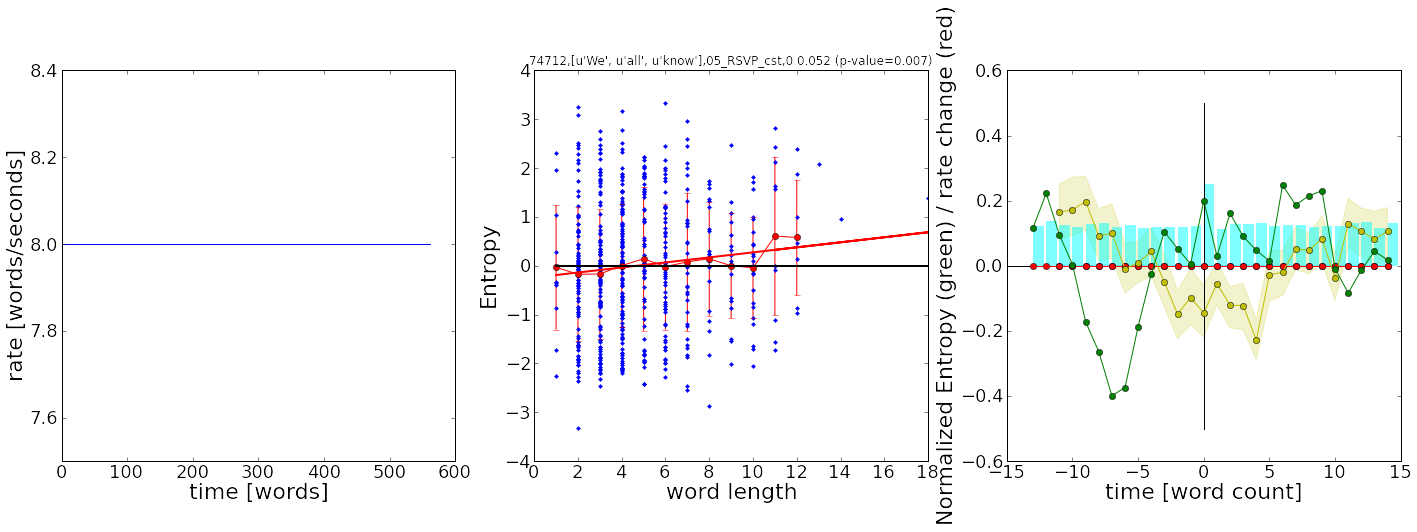

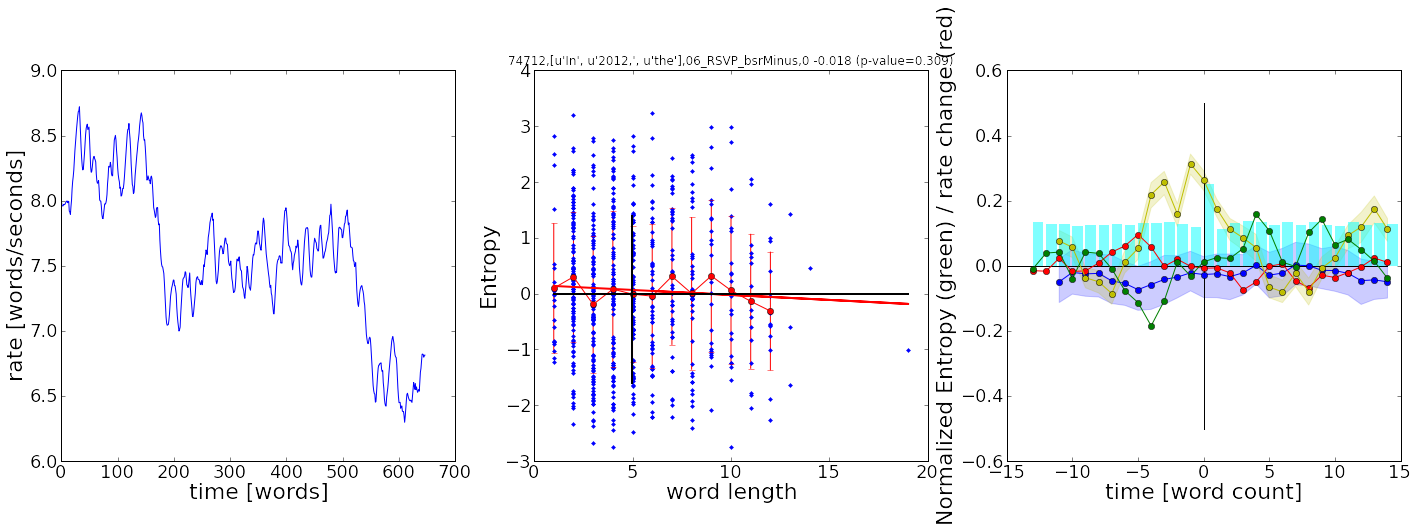

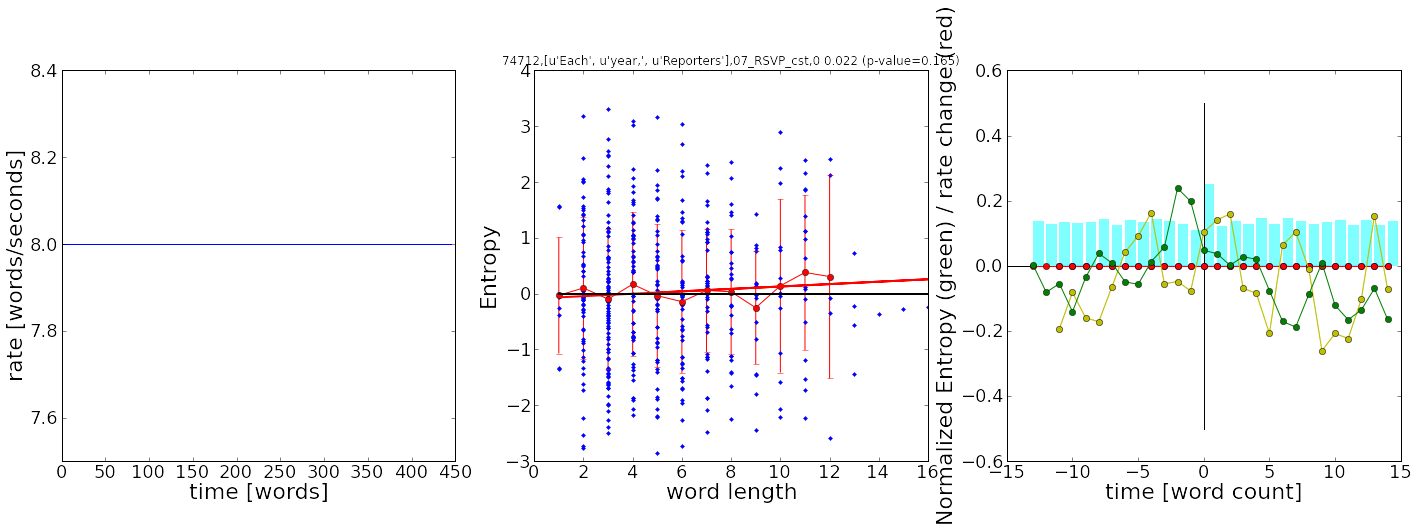

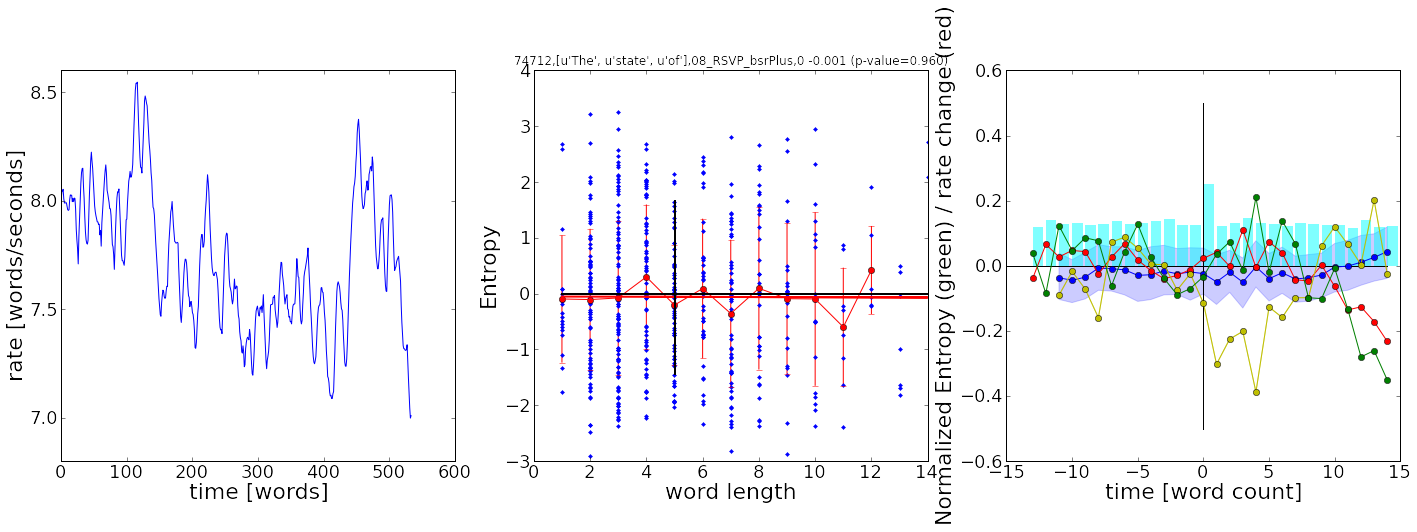

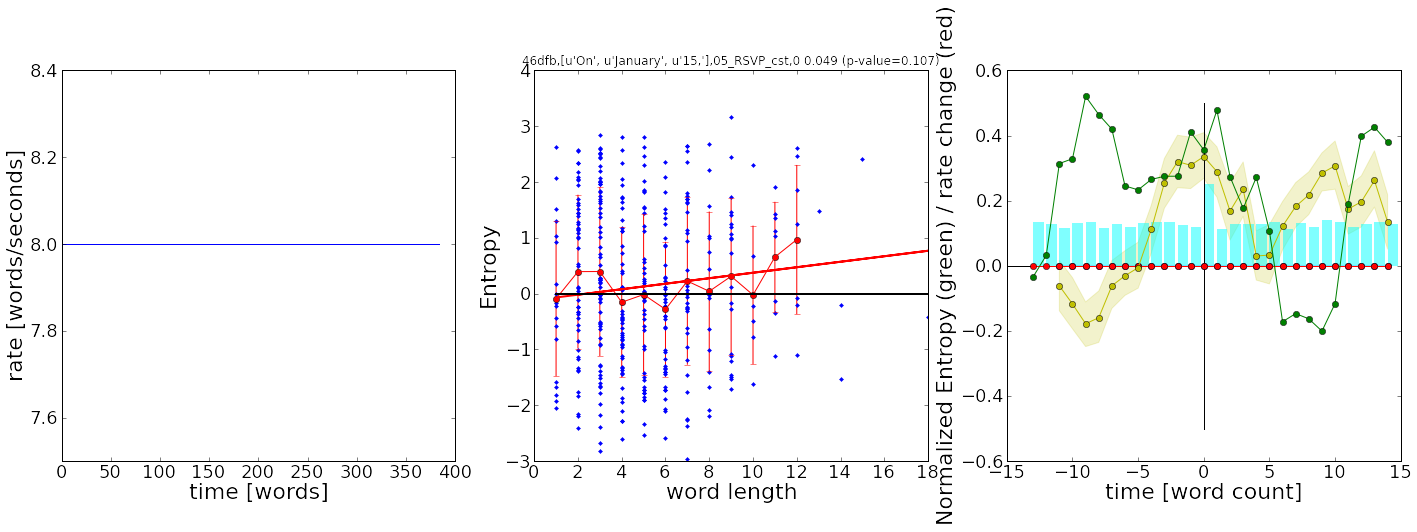

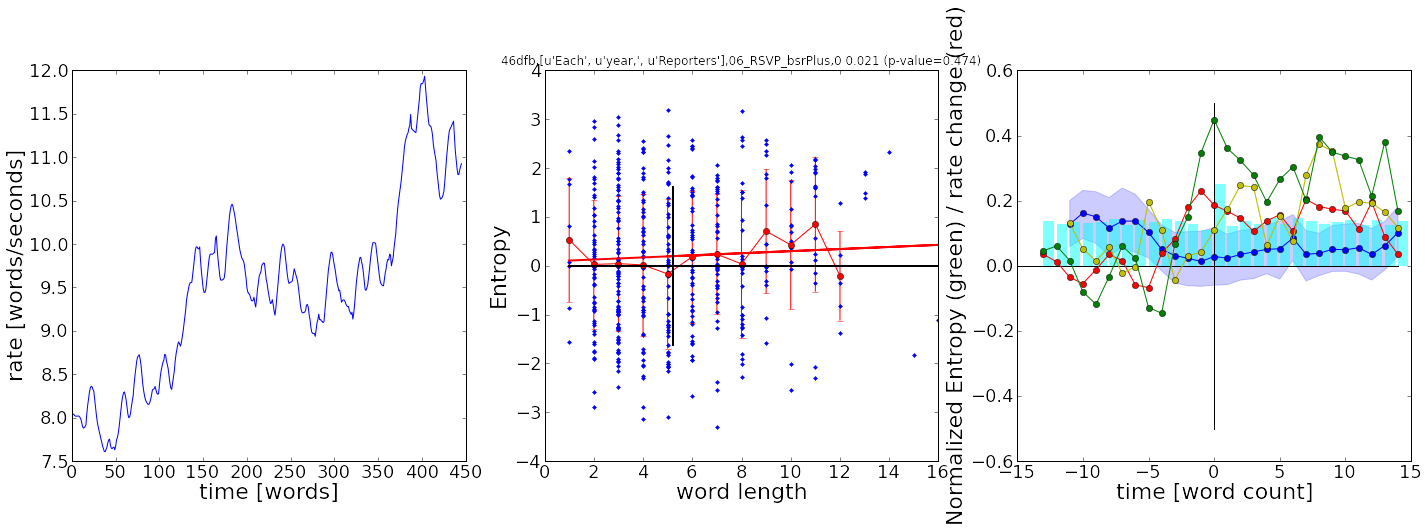

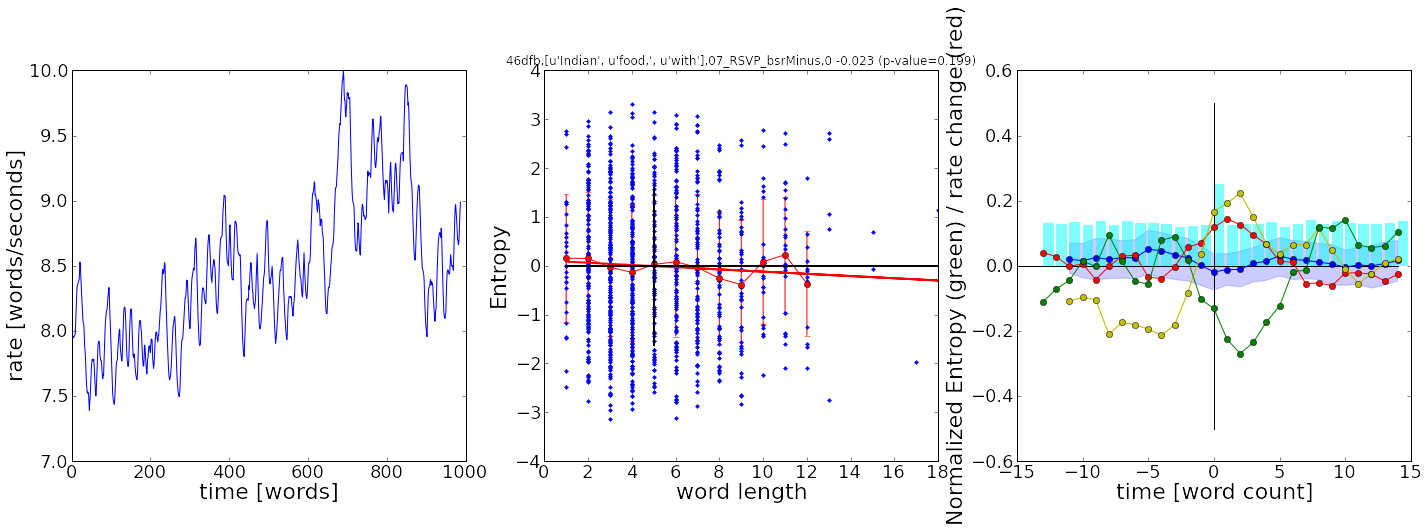

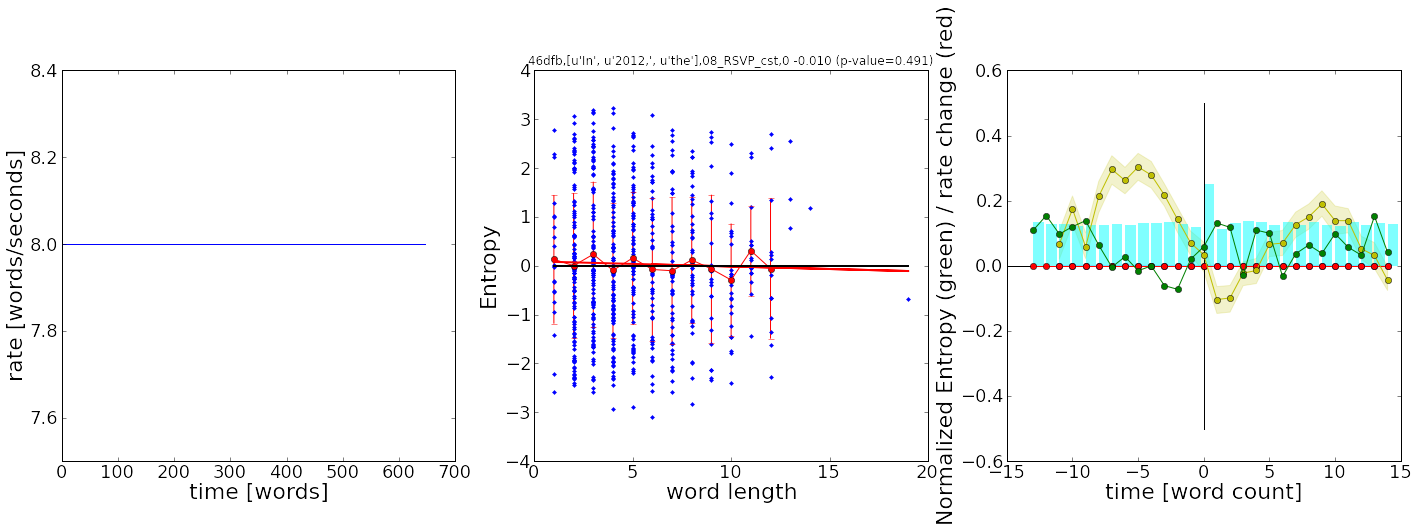

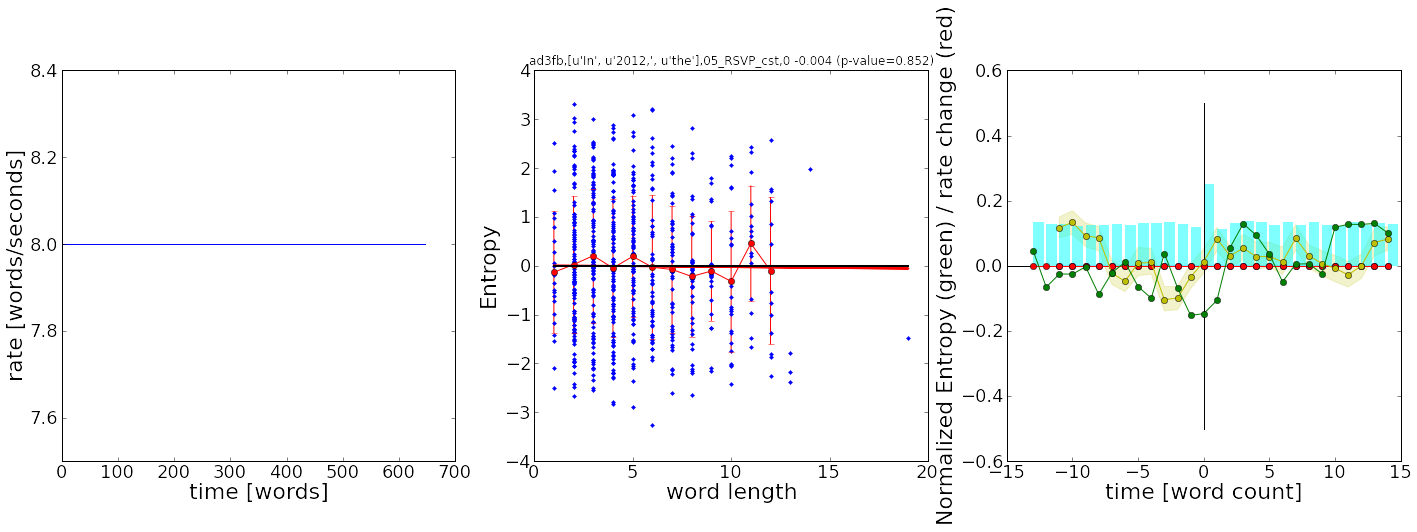

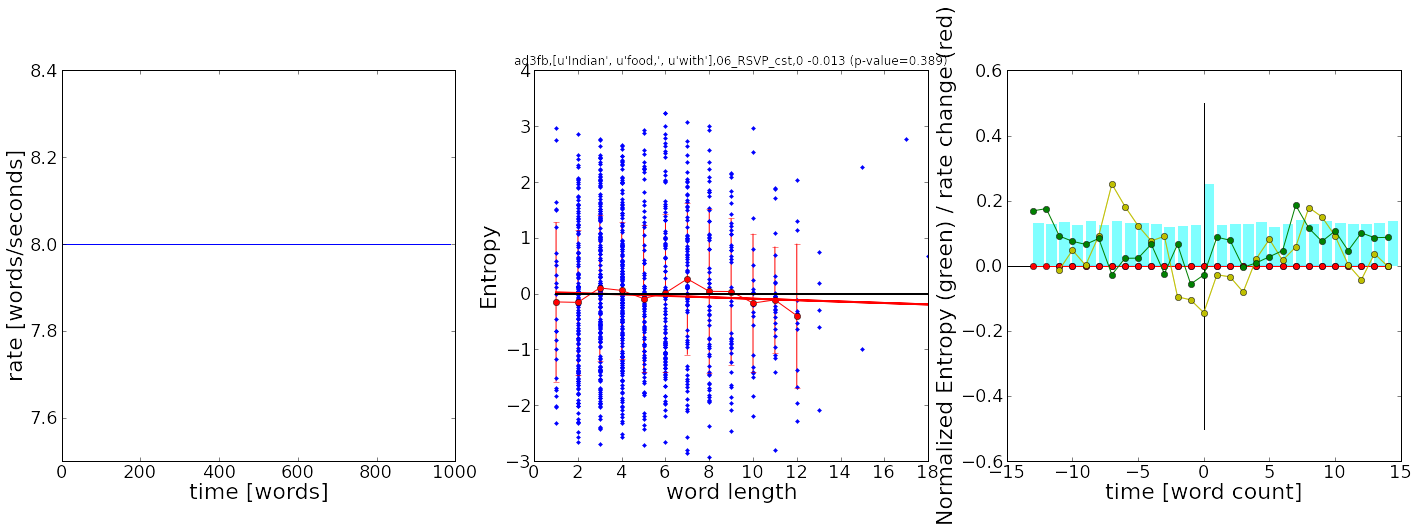

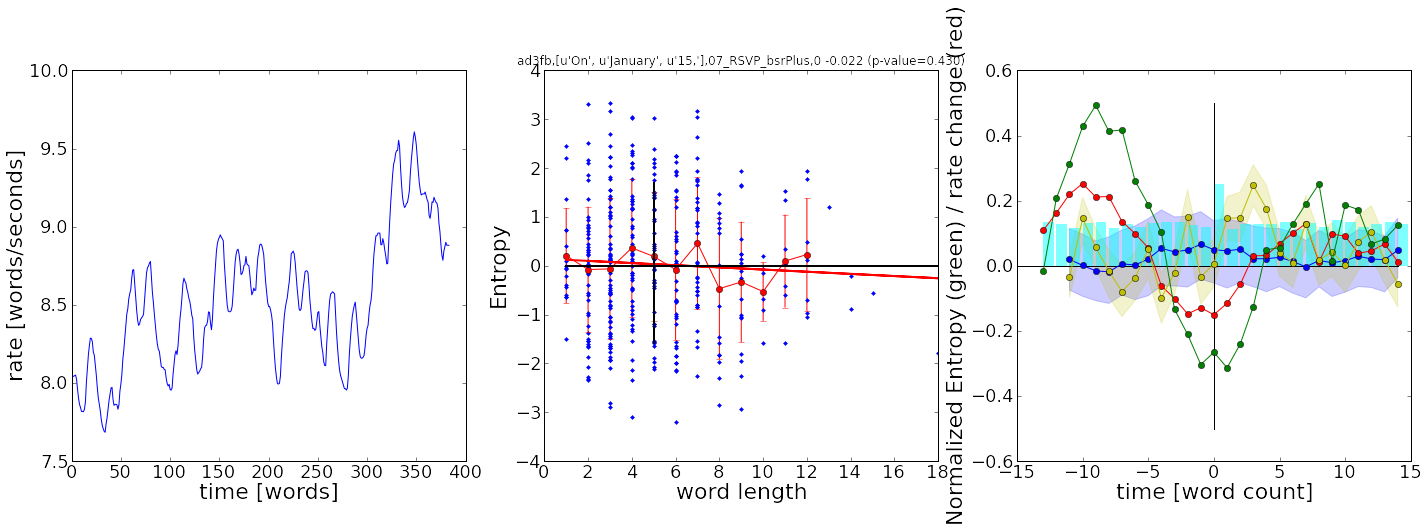

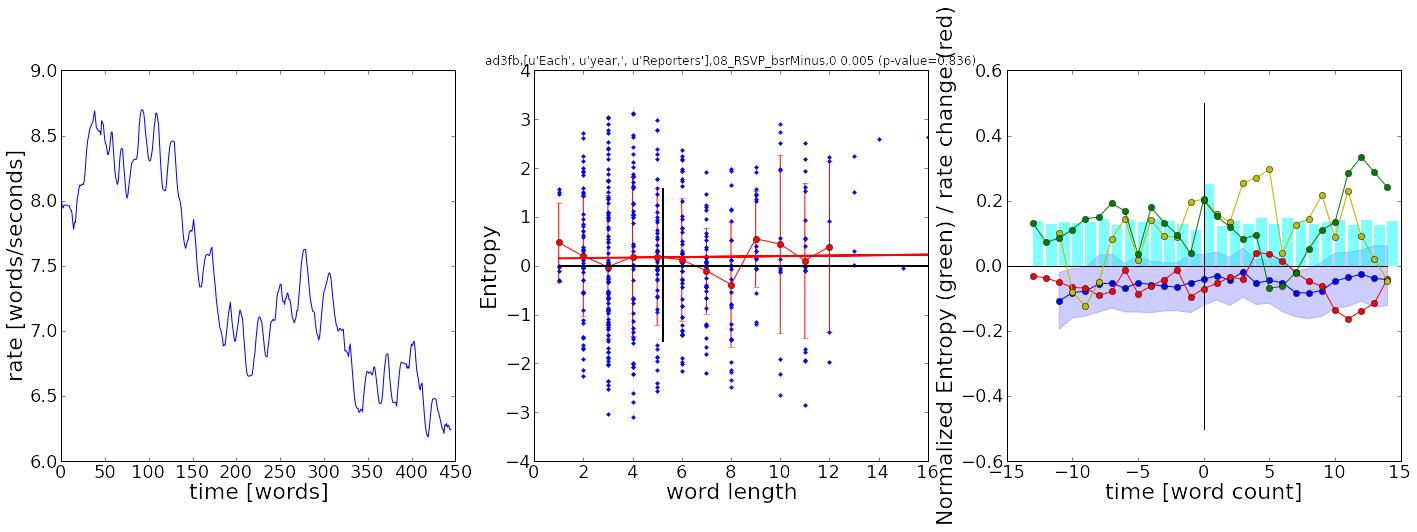

In [3]:
pl.close("all")

slope = []
intercept = []
meanWordLength = []


k = 0
for i,t in enumerate(tokens):
    #print t
    J = allData[t]['J']
    Jlist = allData[t]['Jlist']
    
    for treatment in [5,6,7,8]:
        #if Jlist[treatment][3:] == "RSVP_cst":
        #    continue
        try:
            for d in range(0,5)[:1]:
                k += 1
                words = J[Jlist[treatment]]['exp']['words']
                lWords = np.array([len(word) for word in words])
                #sEntropy = np.array(J[Jlist[treatment]]['exp']['normalized_entropy'][:-1])
                
                #print Jlist[treatment][3:]
                
                #if Jlist[treatment][3:] != "RSVP_bsrMinus":
                #    continue
                    
                #if words[1] != "In":
                #    continue
                
                pl.figure(k,(24,7))
                fitB = rateVsLenWord(J,Jlist,treatment,deque=d,plot=True)
                print t,Jlist[treatment],d,fitB[0]*4+fitB[1],-fitB[1]/fitB[0],"intercept= %.4f, slope= %.4f (p-value=%.2f)"%(fitB[1],fitB[0],fitB[3])
                pl.subplot(132)
                pl.title("%s,%s,%s,%s %.3f (p-value=%.3f)"%(t,words[1:4],Jlist[treatment],d,fitB[0],fitB[3]))
                #I.append(-fitB[1]/fitB[0])
                pl.savefig(rootDir + "figures/" + "examples_%s.eps"%k)
                
                #print words[1],np.percentile(lWords,[10,90])
                
        except:
            print "blah", Jlist[treatment]
            continue
    

3.72370307248e-06 -9.2840361263e-06 0.000180019688891 -1.31778929339 6.69054995338


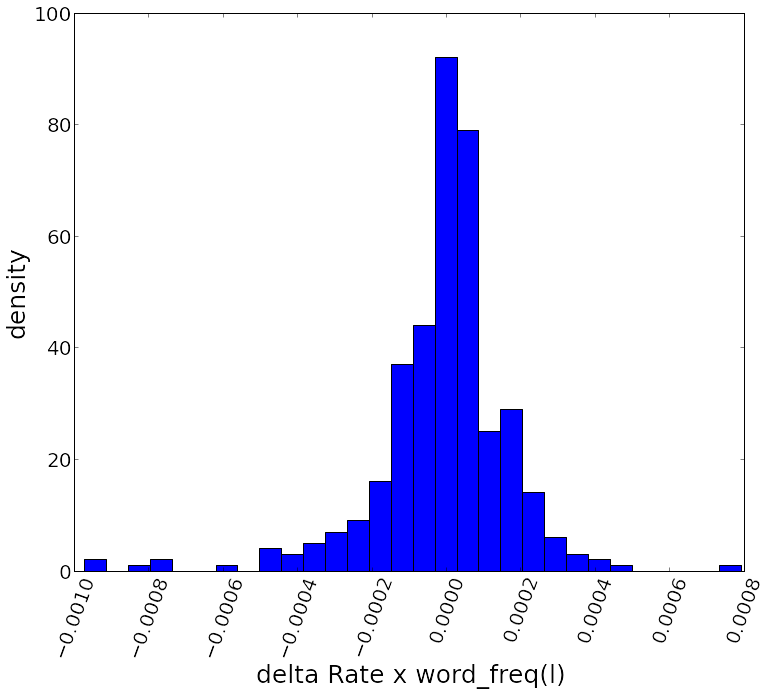

In [671]:
pl.figure(1,(12,10))
H = np.histogram(test,bins = 30)
pl.bar(H[1][:-1],H[0],H[1][-1] - H[1][-2])
print np.median(test),np.mean(test),np.std(test),S.skew(test),S.kurtosis(test)
pl.xlabel("delta Rate x word_freq(l)")
pl.ylabel("density")
pl.xticks(rotation=70)
pl.savefig(rootDir + "figures/jointPDF.eps")

In [19]:
pl.close("all")
pl.figure(1,(12,12))
for i,t in enumerate(tokens):
    J,Jlist = retrieveExperiment(t)
    for treatment in [5,6,7,8]:
        if not Jlist[treatment][3:] == "RSVP_cst":
            continue
            
        try:
            for d in range(0,10)[:5]:
#                pl.figure(i,(10,6))
                fitB = entropyVsLenWord(J,treatment,deque=d,plot=True)
                print t,Jlist[treatment],d,"%.2f (p-value=%.2f)"%(fitB[0],fitB[3])
        except:
            continue
            
        print "\n"
        

KeyboardInterrupt: 

d6dbd
{0: u'00_blink5times', 1: u'01_restingStateOpenEyes', 2: u'02_restingStateClosedEyes', 3: u'03_doMath', 4: u'04_readTextEnglish', 5: u'05_RSVP_cst', 6: u'06_RSVP_bsrMinus', 7: u'07_RSVP_cst', 8: u'config', 9: u'finalQ'}
06_RSVP_bsrMinus
(0.0013181931441073945, -0.00701319994992298, 0.24131596784707418, 0.47470368863051893, 0.0017670277774517159)
no meta found 383 4.0 5.00783289817


(0.0040631074497951393,
 -0.017992857172673963,
 0.832169571459353,
 0.002819705217843335,
 0.00095723741916219995)

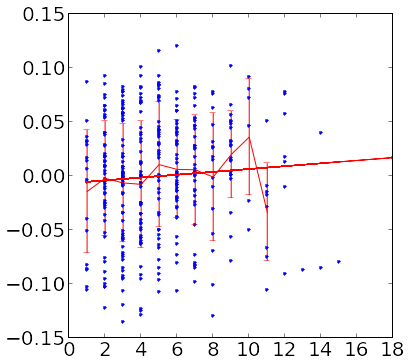

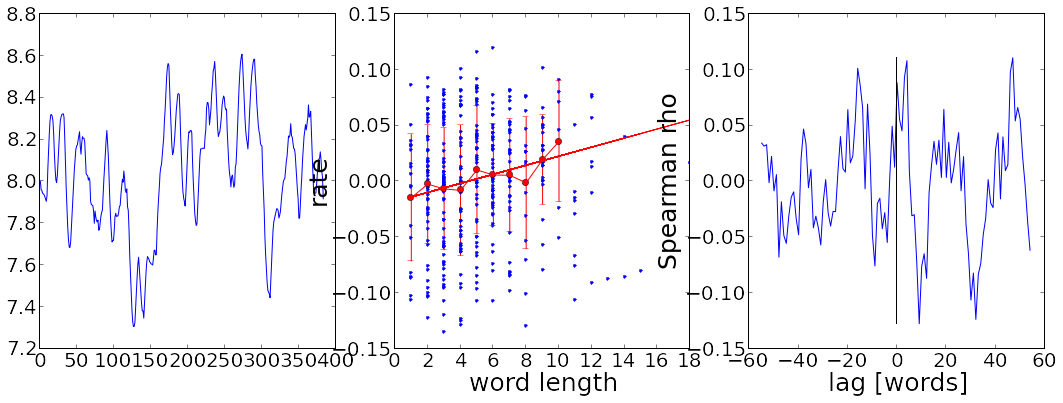

In [708]:
token = "85d6e"
treatment = 6

J,Jlist = retrieveExperiment(token)
print tokens[-5]
print Jlist
print Jlist[treatment]
words = np.array(J[Jlist[treatment]]['exp']['words'])
lWords = np.array([len(word) for word in words])
rate = 1./np.array(J[Jlist[treatment]]['exp']['rate'])
dRate = np.diff(rate)#/map(float,rate[:-1])
s = np.array(J[Jlist[treatment]]['exp']['normalized_entropy'])
pl.close("all")
plot(lWords[:-1],dRate,'.')

c = lWords[:-1] < 12
B = binning(lWords[:-1][c],dRate[c],30)

fitB = S.linregress(B[0],B[1])
pl.errorbar(B[0],B[1],yerr=B[2],color="red")
pl.plot(lWords,lWords*fitB[0] + fitB[1],'r-')
print fitB

pl.figure(2,(18,6))
rateVsLenWord(J,treatment,deque=0,plot=True)

In [738]:
c = np.array(lWords[:-1]) < 11
x = np.array(lWords[c])
lx = np.log10(x)
y = np.array(dRate)[c]
#pl.semilogx(lWords[:-1],dRate,'.')

[ 18.  52.  70.  53.  47.  44.  36.  16.  21.   6.]
(0.0040631074497951393, -0.017992857172673963, 0.832169571459353, 0.002819705217843335, 0.00095723741916219995)
-0.00174042737349 4.4283488426
4.0 4.60606060606


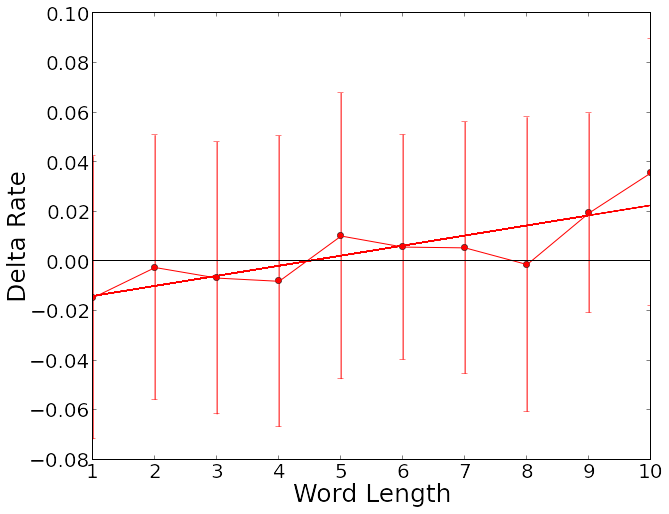

In [739]:
B = binning(x,y,30)
pl.figure(1,(10,8))
#pl.plot(x,y,'.')
plot(B[0],B[1],'ro')

print B[-1]

fitB = S.linregress(B[0],B[1])
print fitB
pl.errorbar(B[0],B[1],yerr=B[2],color="red")
pl.plot(x,x*fitB[0] + fitB[1],'r-')
pl.plot(x,np.zeros_like(x),'k-')
pl.xlabel("Word Length")
pl.ylabel("Delta Rate")

print fitB[0]*4+fitB[1],-fitB[1]/fitB[0]
print np.median(x),np.mean(x)
pl.savefig(rootDir + "figures/delta_rate_vs_wLength.eps")